In [144]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.feature_selection import SelectKBest,f_regression

In [3]:
#import data
data=pd.read_csv(r"G:\datasets\used_car_prices_dataset_final.csv")

In [4]:
data.shape

(4666, 10)

In [5]:
data.head()

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0      15  70539.725266     Honda  Electric       Manual         3.0   
1      11  72118.008487     Honda  Electric    Automatic         4.0   
2       8  38721.050239      Ford    Hybrid       Manual         2.0   
3       7  33675.655109       Kia    Petrol    Automatic         3.0   
4      19  51562.861259  Mercedes    Petrol    Automatic         4.0   

   EngineSize  Horsepower CarCondition   ResalePrice  
0    1.858776  116.781923         Poor  37380.232721  
1    2.464409  150.064915         Fair  58279.184367  
2    1.666394  140.577568         Fair  52420.515613  
3    2.799322  157.020208         Poor  54195.804720  
4    2.423886  196.907490         Fair  57287.511089

In [6]:
data.columns.value_counts()

CarAge          1
Mileage         1
Brand           1
FuelType        1
Transmission    1
OwnerCount      1
EngineSize      1
Horsepower      1
CarCondition    1
ResalePrice     1
Name: count, dtype: int64

In [7]:
data.columns

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4533 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [9]:
data.describe()

CarAge        Mileage   OwnerCount   EngineSize   Horsepower  \
count  4666.000000    4666.000000  4533.000000  4666.000000  4666.000000   
mean     10.272396   51426.427843     2.481800     2.038584   149.847050   
std       5.941061   24202.419914     1.135924     0.578350    39.985538   
min       1.000000  -26733.110969     1.000000    -0.239261   -28.617994   
25%       5.000000   36405.518638     1.000000     1.670417   122.888099   
50%      10.000000   49959.169302     2.000000     2.020539   149.576750   
75%      15.000000   64324.464932     4.000000     2.361428   176.628790   
max      30.000000  150000.000000     4.000000     5.000000   291.701613   

        ResalePrice  
count   4666.000000  
mean   52181.774725  
std    12106.945975  
min     -599.850702  
25%    44039.237132  
50%    52222.640637  
75%    60278.028717  
max    94400.286774

In [10]:
data['Mileage'].min()

-26733.110969187383

In [11]:
data['CarAge'].mode()

0    17
Name: CarAge, dtype: int64

In [12]:
data.isnull().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [13]:
data['OwnerCount'].value_counts()

OwnerCount
1.0    1207
4.0    1151
3.0    1089
2.0    1086
Name: count, dtype: int64

In [14]:
data.duplicated().sum()

0

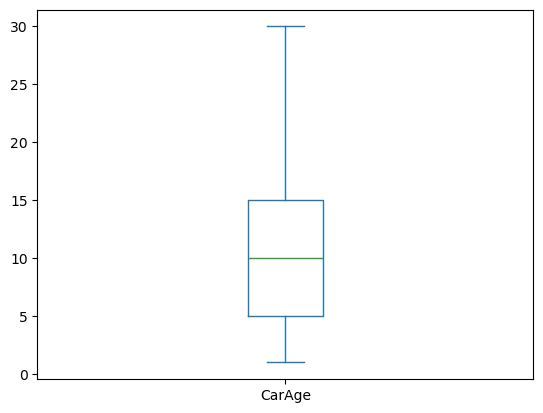

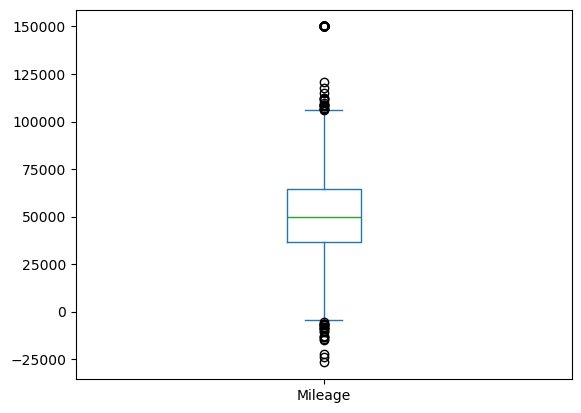

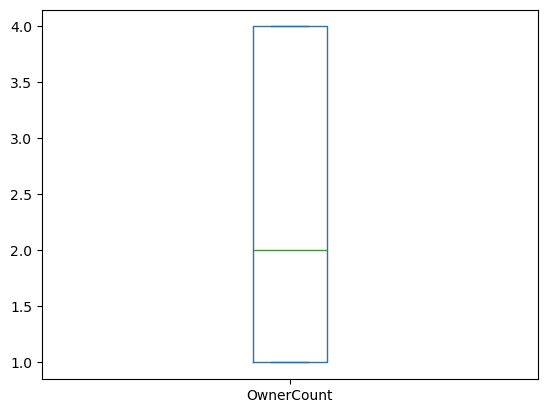

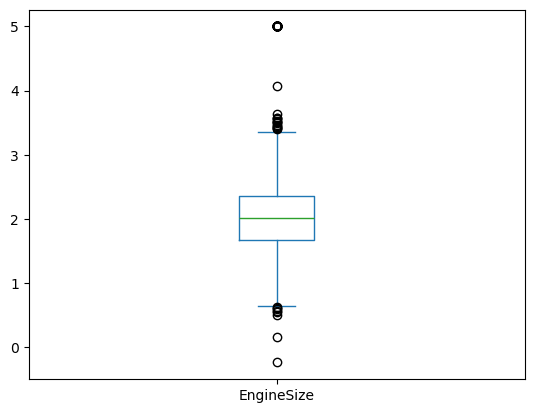

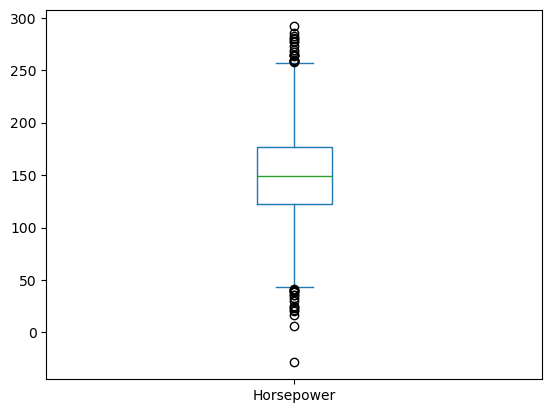

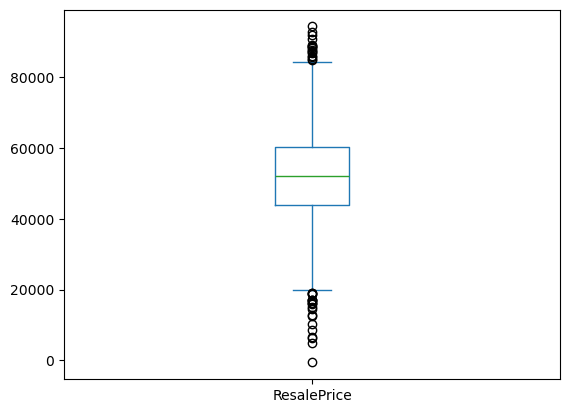

In [15]:
for col in data.columns:
    if data[col].dtypes != "object":
        plt.figure()
        data[col].plot(kind = 'box')
        plt.show()

In [16]:
data['Mileage'].dtypes

dtype('float64')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4533 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [18]:
num_col=[]
for col in data.columns:
    if data[col].dtypes != "object":
        num_col.append(col)
print(num_col)

['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower', 'ResalePrice']


In [19]:
data[num_col].corr()

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  \
CarAge       1.000000  0.061936    0.034821    0.027316    0.009051   
Mileage      0.061936  1.000000    0.014765    0.055866   -0.000176   
OwnerCount   0.034821  0.014765    1.000000   -0.007302    0.015496   
EngineSize   0.027316  0.055866   -0.007302    1.000000   -0.011504   
Horsepower   0.009051 -0.000176    0.015496   -0.011504    1.000000   
ResalePrice -0.477215 -0.210357    0.008008    0.204210    0.654101   

             ResalePrice  
CarAge         -0.477215  
Mileage        -0.210357  
OwnerCount      0.008008  
EngineSize      0.204210  
Horsepower      0.654101  
ResalePrice     1.000000

C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

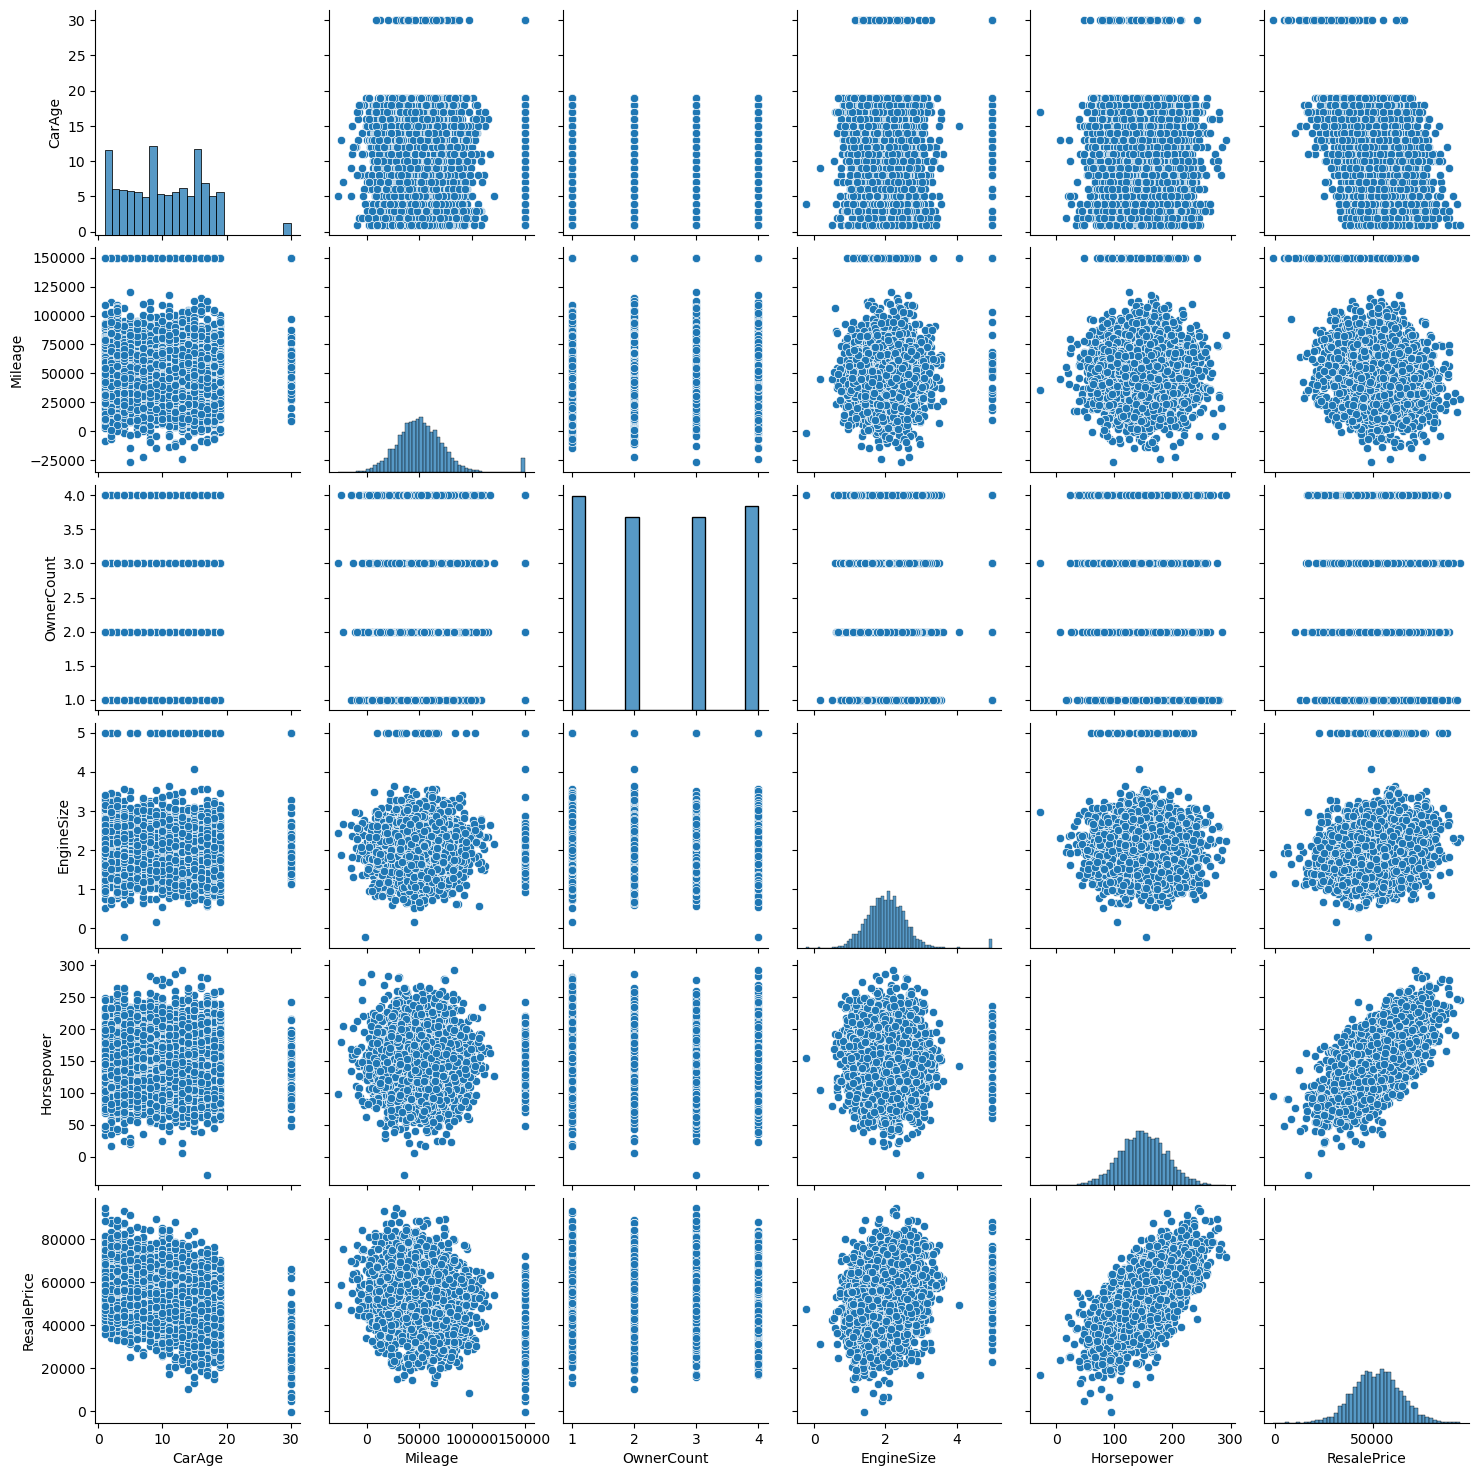

In [20]:
sns.pairplot(data)

# Analysis
1.There is no much difference in mean and median ,so maybe their will be no outlier
2.Mileage,Enginesize, horsepowerr,resaleprice having negative values
3.Owner count column having 133 null values
4.car_age standard deviation is 5 , so most of the car having age around 5,6,4.
5.no duplicated data
6.based on the Box plot of numerical data except ownercount and car_age other column having outliers

7.car_age and resaleprice = -0.477, which means both having medium negative correlation, car_age increase price decrease
8.mileage and resaleprice = -.0.21, which means both having slightly negative correlation, mileage increase price decrease
9.enginesize and resaleprice = 0.20, which means both having slightly positive correlation, enginesize increase price increase
10.horsepower and resaleprice = 0.65, which means both having strong positive correlation, horsepower increase price increase

# Catagorical columns

11.Car condition, brand making few changes in resale price column
12.fuel,trasmission not doing any changes in resale price column

# EDA


In [21]:
data.columns

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')

<Axes: >

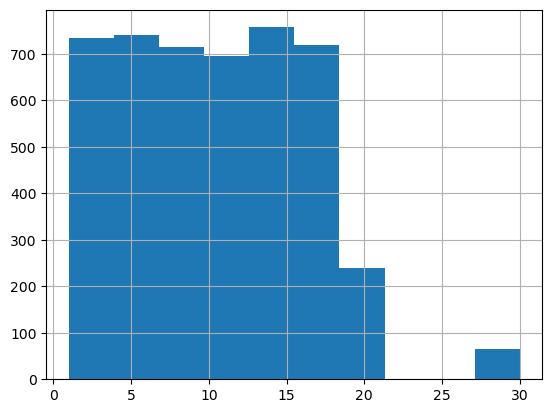

In [22]:
data['CarAge'].hist()

<Axes: >

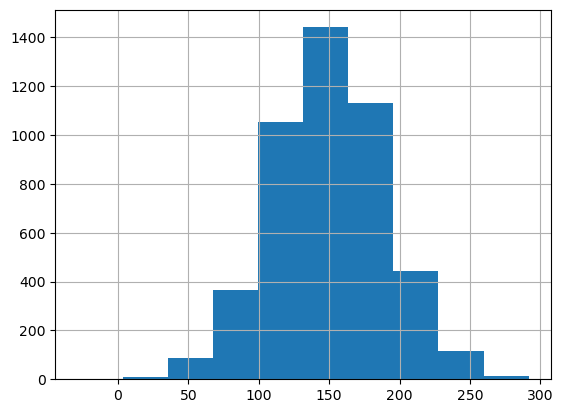

In [23]:
data['Horsepower'].hist()

<Axes: >

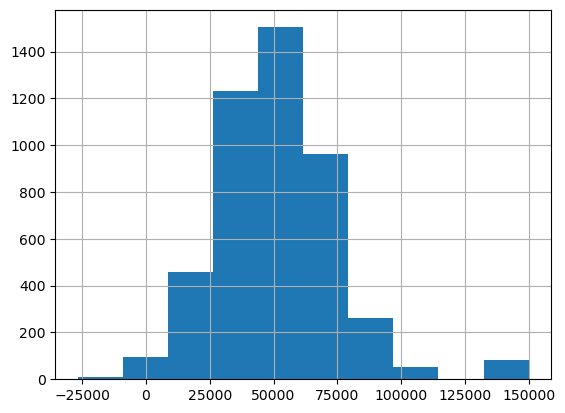

In [24]:
data['Mileage'].hist()

<Axes: xlabel='OwnerCount'>

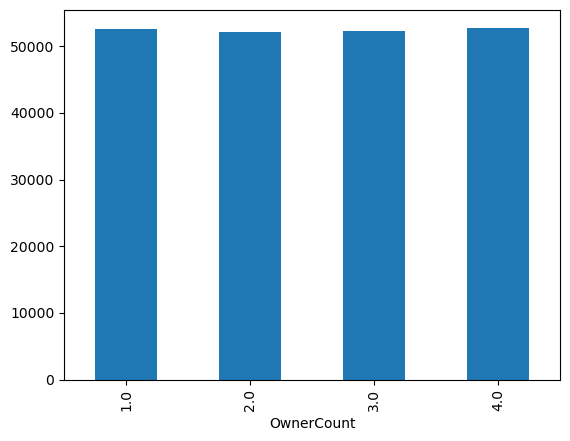

In [25]:
data.groupby('OwnerCount').ResalePrice.mean().plot(kind='bar')

In [26]:
# Owner count not making any changes in price

<Axes: xlabel='CarCondition'>

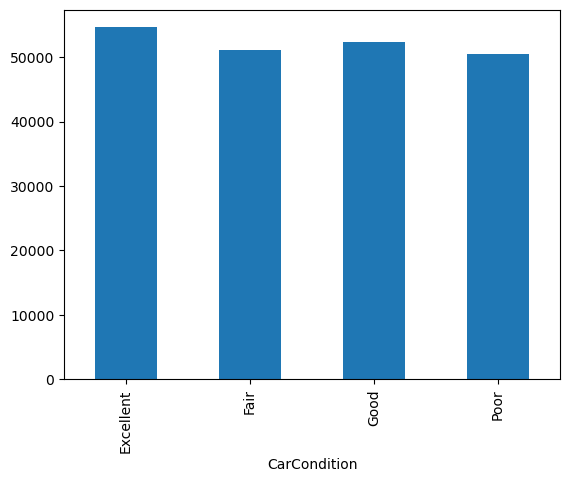

In [27]:
data.groupby('CarCondition').ResalePrice.mean().plot(kind='bar')

<Axes: xlabel='Brand'>

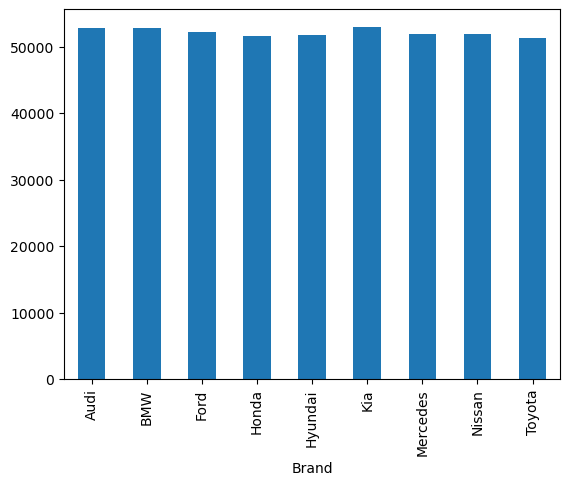

In [28]:
data.groupby('Brand').ResalePrice.mean().plot(kind='bar')

<Axes: xlabel='FuelType'>

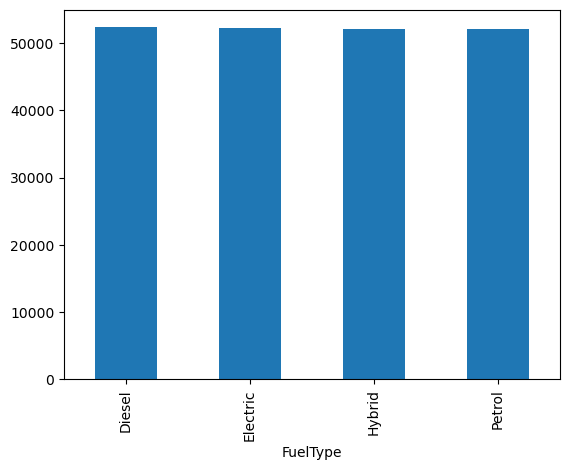

In [29]:
data.groupby('FuelType').ResalePrice.mean().plot(kind='bar')

<Axes: xlabel='Transmission'>

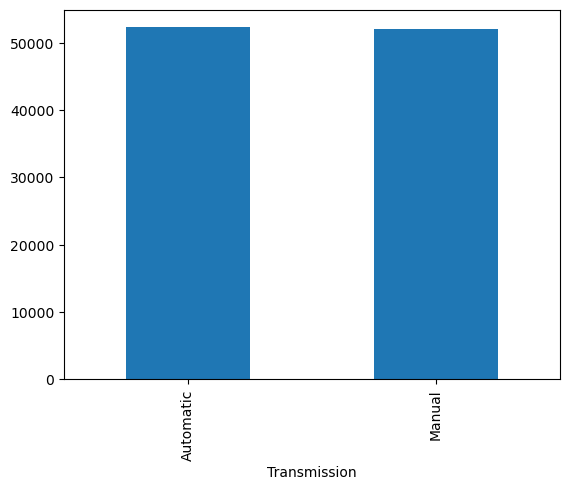

In [30]:
data.groupby('Transmission').ResalePrice.mean().plot(kind='bar')

# preprocessing

# Step 1 -  Removing null values using mode

In [31]:
data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [32]:
data.shape


(4666, 10)

In [33]:
data['OwnerCount'].mode()[0]

1.0

In [34]:
data['OwnerCount'].fillna(data['OwnerCount'].mode()[0],inplace=True)

In [35]:
data.isna().sum()

CarAge          0
Mileage         0
Brand           0
FuelType        0
Transmission    0
OwnerCount      0
EngineSize      0
Horsepower      0
CarCondition    0
ResalePrice     0
dtype: int64

In [36]:
data.head()

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0      15  70539.725266     Honda  Electric       Manual         3.0   
1      11  72118.008487     Honda  Electric    Automatic         4.0   
2       8  38721.050239      Ford    Hybrid       Manual         2.0   
3       7  33675.655109       Kia    Petrol    Automatic         3.0   
4      19  51562.861259  Mercedes    Petrol    Automatic         4.0   

   EngineSize  Horsepower CarCondition   ResalePrice  
0    1.858776  116.781923         Poor  37380.232721  
1    2.464409  150.064915         Fair  58279.184367  
2    1.666394  140.577568         Fair  52420.515613  
3    2.799322  157.020208         Poor  54195.804720  
4    2.423886  196.907490         Fair  57287.511089

# step2 - Catogorical data encoding

Label encoding - CarCondition,Fuel Type
oneHot Encoding - Brand,Transmission


In [37]:
print(data['CarCondition'].value_counts())
print(data['FuelType'].value_counts())
print(data['Brand'].value_counts())
print(data['Transmission'].value_counts())

CarCondition
Fair         1190
Excellent    1188
Poor         1148
Good         1140
Name: count, dtype: int64
FuelType
Diesel      1221
Hybrid      1176
Electric    1146
Petrol      1123
Name: count, dtype: int64
Brand
Ford        540
BMW         529
Toyota      527
Kia         522
Hyundai     522
Mercedes    519
Audi        514
Honda       504
Nissan      489
Name: count, dtype: int64
Transmission
Manual       2364
Automatic    2302
Name: count, dtype: int64


In [38]:
mapping_Carcondition={'Excellent':4,'Good':3,'Fair':2,'Poor':1}

In [39]:
data1=data  #null value removed data set

In [40]:
data1['CarCondition']=data1['CarCondition'].map(mapping_Carcondition)

In [41]:
mapping_Transmission={'Manual':0,'Automatic':1}

In [42]:
data1['Transmission']=data1['Transmission'].map(mapping_Transmission)

In [43]:
# data1 = pd.get_dummies(data1['FuelType'],dtype=int,drop_first=True)

In [44]:
data1=data  #null value removed data set

In [45]:
data1

CarAge       Mileage     Brand  FuelType  Transmission  OwnerCount  \
0         15  70539.725266     Honda  Electric             0         3.0   
1         11  72118.008487     Honda  Electric             1         4.0   
2          8  38721.050239      Ford    Hybrid             0         2.0   
3          7  33675.655109       Kia    Petrol             1         3.0   
4         19  51562.861259  Mercedes    Petrol             1         4.0   
...      ...           ...       ...       ...           ...         ...   
4661       4  22710.582928      Audi    Hybrid             0         2.0   
4662       4  66193.150603   Hyundai    Diesel             1         4.0   
4663       1  54614.234981      Ford  Electric             1         2.0   
4664       7  52035.766674    Toyota    Hybrid             0         4.0   
4665      18  56126.950679    Toyota    Petrol             0         1.0   

      EngineSize  Horsepower  CarCondition   ResalePrice  
0       1.858776  116.781923             1  37380.232721  
1       2.464409  150.064915             2  58279.184367  
2       1.666394  140.577568             2  52420.515613  
3       2.799322  157.020208             1  54195.804720  
4       2.423886  196.907490             2  57287.511089  
...          ...         ...           ...           ...  
4661    1.839159  170.177585             2  56808.958580  
4662    1.838883  162.177454             1  56224.633133  
4663    2.478123  178.078306             4  68440.018358  
4664    1.629055  191.210803             4  64847.894059  
4665    0.988205  173.368420             2  43329.185500  

[4666 rows x 10 columns]

In [46]:
data1 = pd.get_dummies(data1, columns=['FuelType'], drop_first=True,dtype=int)

In [47]:
data1.head()

CarAge       Mileage     Brand  Transmission  OwnerCount  EngineSize  \
0      15  70539.725266     Honda             0         3.0    1.858776   
1      11  72118.008487     Honda             1         4.0    2.464409   
2       8  38721.050239      Ford             0         2.0    1.666394   
3       7  33675.655109       Kia             1         3.0    2.799322   
4      19  51562.861259  Mercedes             1         4.0    2.423886   

   Horsepower  CarCondition   ResalePrice  FuelType_Electric  FuelType_Hybrid  \
0  116.781923             1  37380.232721                  1                0   
1  150.064915             2  58279.184367                  1                0   
2  140.577568             2  52420.515613                  0                1   
3  157.020208             1  54195.804720                  0                0   
4  196.907490             2  57287.511089                  0                0   

   FuelType_Petrol  
0                0  
1                0  
2                0  
3                1  
4                1

In [48]:
data1 = pd.get_dummies(data1,columns=['Brand'],drop_first=True,dtype=int)

In [49]:
data1 = data1.drop(columns=['ResalePrice'])

In [50]:
# Scaling
scaling = StandardScaler()
apply_fea_to_col = data1.select_dtypes(include=['int64','float64']).columns
data1[apply_fea_to_col]=scaling.fit_transform(data1[apply_fea_to_col])

In [51]:
data1['CarAge'].dtype

dtype('float64')

In [52]:
data1

CarAge   Mileage  Transmission  OwnerCount  EngineSize  Horsepower  \
0     0.795836  0.789811     -0.986800    0.488897   -0.310932   -0.827016   
1     0.122484  0.855030      1.013377    1.361247    0.736355    0.005449   
2    -0.382531 -0.525019     -0.986800   -0.383452   -0.643607   -0.231846   
3    -0.550869 -0.733508      1.013377    0.488897    1.315501    0.179413   
4     1.469189  0.005638      1.013377    1.361247    0.666281    1.177063   
...        ...       ...           ...         ...         ...         ...   
4661 -1.055884 -1.186614     -0.986800   -0.383452   -0.344854    0.508502   
4662 -1.055884  0.610200      1.013377    1.361247   -0.345330    0.308405   
4663 -1.560898  0.131729      1.013377   -0.383452    0.760070    0.706112   
4664 -0.550869  0.025179     -0.986800    1.361247   -0.708175    1.034579   
4665  1.300851  0.194238     -0.986800   -1.255802   -1.816360    0.588310   

      CarCondition  FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0        -1.347687                  1                0                0   
1        -0.453700                  1                0                0   
2        -0.453700                  0                1                0   
3        -1.347687                  0                0                1   
4        -0.453700                  0                0                1   
...            ...                ...              ...              ...   
4661     -0.453700                  0                1                0   
4662     -1.347687                  0                0                0   
4663      1.334276                  1                0                0   
4664      1.334276                  0                1                0   
4665     -0.453700                  0                0                1   

      Brand_BMW  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Kia  \
0             0           0            1              0          0   
1             0           0            1              0          0   
2             0           1            0              0          0   
3             0           0            0              0          1   
4             0           0            0              0          0   
...         ...         ...          ...            ...        ...   
4661          0           0            0              0          0   
4662          0           0            0              1          0   
4663          0           1            0              0          0   
4664          0           0            0              0          0   
4665          0           0            0              0          0   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  
0                  0             0             0  
1                  0             0             0  
2                  0             0             0  
3                  0             0             0  
4                  1             0             0  
...              ...           ...           ...  
4661               0             0             0  
4662               0             0             0  
4663               0             0             0  
4664               0             0             1  
4665               0             0             1  

[4666 rows x 18 columns]

In [61]:
data1.shape

(4666, 18)

In [62]:
data.shape

(4666, 10)

# model

In [89]:
X = data1
y = data['ResalePrice']

In [90]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=23)



In [91]:
model=LinearRegression()

In [92]:
model.fit(train_X,train_y)

LinearRegression()

In [93]:
model.coef_

array([-5908.26818294, -2395.40934181,   183.66382132,   179.03126117,
        2923.57216392,  8075.65018544,  1606.70879316,   -90.08860308,
        -169.44210348,  -244.97152388,   178.04765877,    58.77690813,
        -333.34941434,  -373.338855  ,   426.10766543,  -328.31931831,
         514.05199584,   -28.08608406])

In [94]:
pd.DataFrame(model.coef_,index=data1.columns)

0
CarAge            -5908.268183
Mileage           -2395.409342
Transmission        183.663821
OwnerCount          179.031261
EngineSize         2923.572164
Horsepower         8075.650185
CarCondition       1606.708793
FuelType_Electric   -90.088603
FuelType_Hybrid    -169.442103
FuelType_Petrol    -244.971524
Brand_BMW           178.047659
Brand_Ford           58.776908
Brand_Honda        -333.349414
Brand_Hyundai      -373.338855
Brand_Kia           426.107665
Brand_Mercedes     -328.319318
Brand_Nissan        514.051996
Brand_Toyota        -28.086084

In [95]:
model.intercept_

52361.45492309637

In [96]:
train_predict=model.predict(train_X)
test_predict=model.predict(test_X)


In [102]:
def evaluate(predict,actual,source):
    print(source)
    print("MSE")
    MSE=mean_squared_error(actual,predict)
    print(MSE)
    print("RMSE")
    RMSE=np.sqrt(MSE)
    print(RMSE)
    print("MAPE")    
    MAPE=mean_absolute_percentage_error(actual,predict)
    print(MAPE)
    print("R square")
    rsquare=r2_score(actual,predict)
    print(rsquare)
    return MSE,RMSE,MAPE,rsquare

In [103]:
train_result=evaluate(train_y,train_predict,"train_result")
test_result=evaluate(test_y,test_predict,"test_result")

train_result
MSE
34624079.0926018
RMSE
5884.222896237175
MAPE
0.09540209896837522
R square
0.7033216971722431
test_result
MSE
33217715.905438233
RMSE
5763.4812314640385
MAPE
0.09208535323529411
R square
0.7061376915948026


In [112]:
first_prediction_result=pd.DataFrame([train_result]+[test_result],index=["train","test"],columns=["MSE","RMSE","MAPE","r square"])

In [113]:
first_prediction_result

MSE     RMSE  MAPE  r square
train 34,624,079.09 5,884.22  0.10      0.70
test  33,217,715.91 5,763.48  0.09      0.71

# prediction 2

# Analysis
1.Based on the box plot, mileage,EngineSize,Horsepower these three columns having outliers
2.plot hist graph for those columns
3.Check correlation of those columns with resaleprice
4.using feature selection selecting the columns

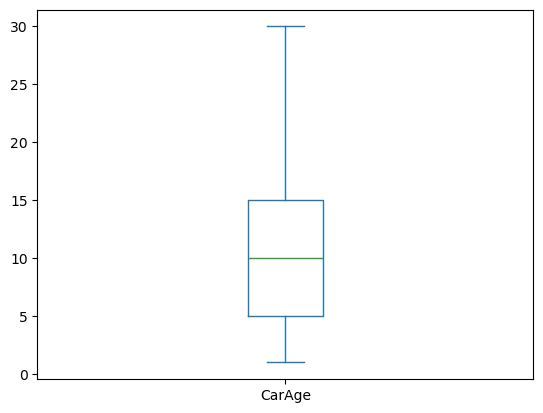

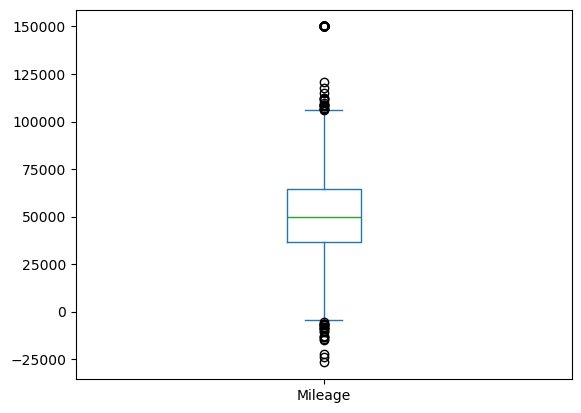

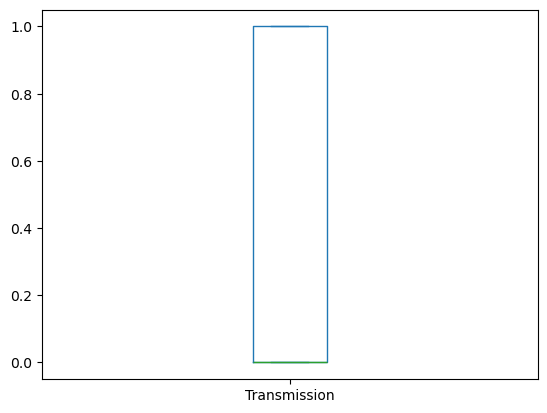

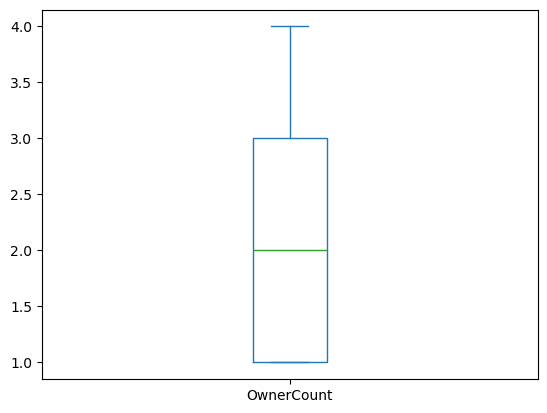

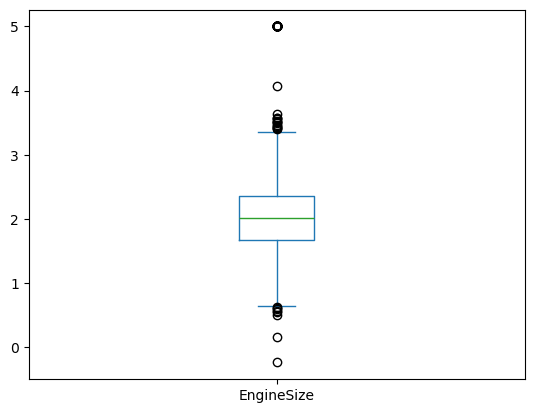

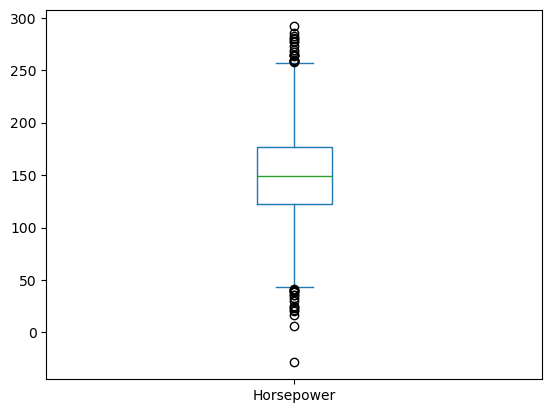

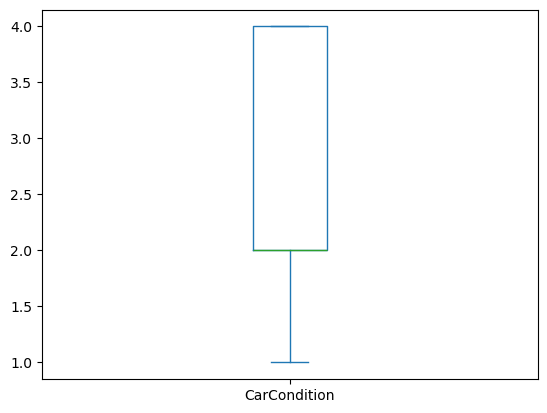

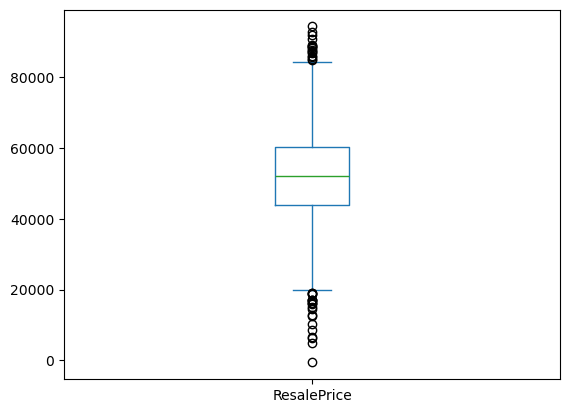

In [128]:
for col in data.columns:
    if data[col].dtypes != "object":
        plt.figure()
        data[col].plot(kind = 'box')
        plt.show()

<Axes: >

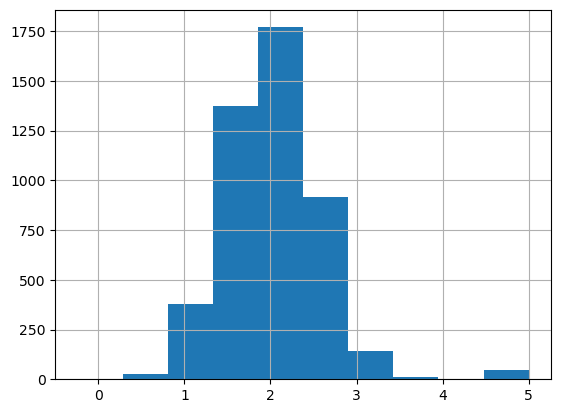

In [130]:
data['EngineSize'].hist()

In [132]:
data['EngineSize'].value_counts()

EngineSize
5.00    48
1.86     1
2.15     1
2.48     1
0.62     1
        ..
1.96     1
1.80     1
2.82     1
2.36     1
0.99     1
Name: count, Length: 4619, dtype: int64

<Axes: xlabel='EngineSize', ylabel='ResalePrice'>

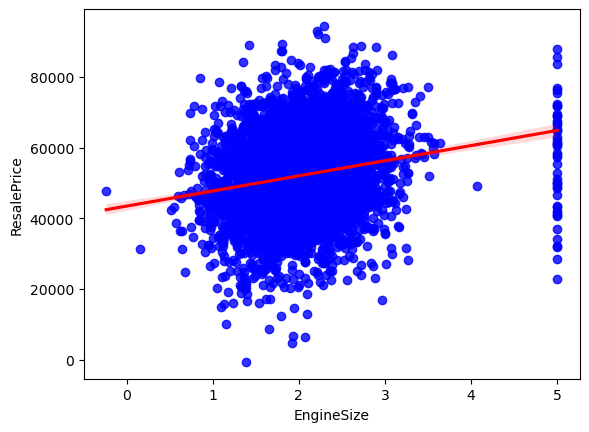

In [138]:
sns.regplot(x='EngineSize', y='ResalePrice', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})


<Axes: xlabel='Horsepower', ylabel='ResalePrice'>

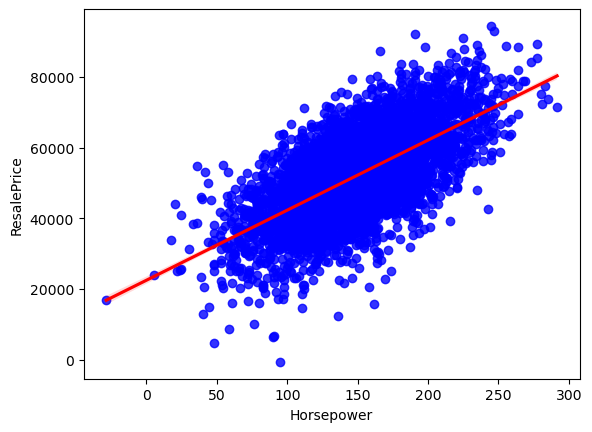

In [142]:
sns.regplot(x='Horsepower', y='ResalePrice', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})


<Axes: xlabel='Mileage', ylabel='ResalePrice'>

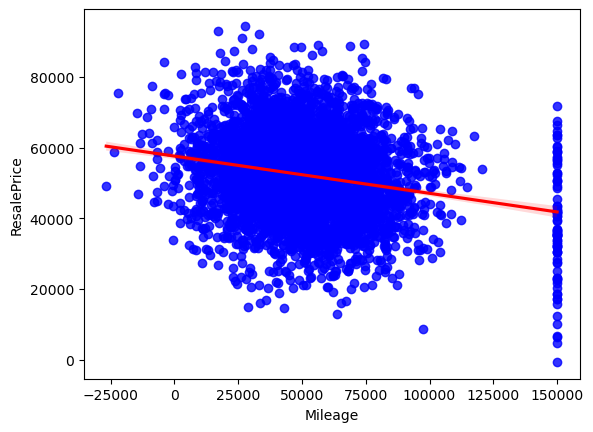

In [143]:
sns.regplot(x='Mileage', y='ResalePrice', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})   

In [147]:
selection=SelectKBest(f_regression,k=5)
X_select=selection.fit_transform(data1,y)
X_select

array([[ 0.79583611,  0.78981135, -0.31093164, -0.82701577, -1.34768725],
       [ 0.1224835 ,  0.85503013,  0.73635477,  0.00544917, -0.45369966],
       [-0.38253095, -0.52501937, -0.643607  , -0.23184572, -0.45369966],
       ...,
       [-1.56089801,  0.13172851,  0.76007006,  0.70611233,  1.33427552],
       [-0.5508691 ,  0.02517947, -0.7081749 ,  1.03457869,  1.33427552],
       [ 1.30085056,  0.19423788, -1.81636019,  0.58830997, -0.45369966]])

In [148]:
selection.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False])

In [149]:
data1.columns

Index(['CarAge', 'Mileage', 'Transmission', 'OwnerCount', 'EngineSize',
       'Horsepower', 'CarCondition', 'FuelType_Electric', 'FuelType_Hybrid',
       'FuelType_Petrol', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota'],
      dtype='object')

In [152]:
data[num_col].corr()

CarAge  Mileage  OwnerCount  EngineSize  Horsepower  ResalePrice
CarAge         1.00     0.06       -0.03        0.03        0.01        -0.48
Mileage        0.06     1.00       -0.00        0.06       -0.00        -0.21
OwnerCount    -0.03    -0.00        1.00       -0.02        0.02         0.04
EngineSize     0.03     0.06       -0.02        1.00       -0.01         0.20
Horsepower     0.01    -0.00        0.02       -0.01        1.00         0.65
ResalePrice   -0.48    -0.21        0.04        0.20        0.65         1.00

# model 2


In [159]:
X2 = data1[['CarAge','Mileage','EngineSize','Horsepower','CarCondition']]
y2 = data['ResalePrice']

In [160]:
train_X2,test_X2,train_y2,test_y2 = train_test_split(X2,y2,test_size=0.3,random_state=23)

In [161]:
model=LinearRegression()
model.fit(train_X2,train_y2)

LinearRegression()

In [162]:
model.coef_

array([-5922.23905932, -2398.79249445,  2925.7920746 ,  8082.17873599,
        1607.27999629])

In [163]:
model.intercept_


52248.266414985526

In [164]:
train_predict2=model.predict(train_X2)
test_predict2=model.predict(test_X2)

In [165]:
train_result2=evaluate(train_y2,train_predict2,"train_result2")
test_result2=evaluate(test_y2,test_predict2,"test_result2")

train_result2
MSE
34788331.03636207
RMSE
5898.16336128138
MAPE
0.09588733903546234
R square
0.7014941778656449
test_result2
MSE
33084599.943591863
RMSE
5751.921413196799
MAPE
0.09207058282785986
R square
0.7080694464968524


In [166]:
second_prediction_result=pd.DataFrame([train_result2]+[test_result2],index=["train","test"],columns=["MSE","RMSE","MAPE","r square"])

In [167]:
second_prediction_result

MSE     RMSE  MAPE  r square
train 34,788,331.04 5,898.16  0.10      0.70
test  33,084,599.94 5,751.92  0.09      0.71

In [168]:
X2.columns

Index(['CarAge', 'Mileage', 'EngineSize', 'Horsepower', 'CarCondition'], dtype='object')

# Prediction 3

1.Their is an direct and strong positive relation between Horsepower and Resaleprice [based on the correlation]

In [171]:
X3 = data1['Horsepower'].values.reshape(-1,1)
Y3 = data['ResalePrice'].values
train_X3,test_X3,train_y3,test_y3 = train_test_split(X3,Y3,test_size=0.3,random_state=23)
model=LinearRegression()
model.fit(X3,Y3)


LinearRegression()

In [172]:
model.coef_

array([7918.31403936])

In [173]:
model.intercept_

52181.774725302435

In [175]:
train_predict3=model.predict(train_X3)
test_predict3=model.predict(test_X3)
train_result3=evaluate(train_y3,train_predict3,"train_result3")
test_result3=evaluate(test_y3,test_predict3,"test_result3")

train_result3
MSE
86740700.28607675
RMSE
9313.468756917411
MAPE
0.14480635660574276
R square
-0.38168680692116475
test_result3
MSE
77096509.06484862
RMSE
8780.461779704336
MAPE
0.13836867203987777
R square
-0.23469006966578765


In [183]:
Third_prediction_result=pd.DataFrame([train_result3]+[test_result3],index=["train","test"],columns=["MSE","RMSE","MAPE","r square"])

In [184]:
Third_prediction_result

MSE     RMSE  MAPE  r square
train 86,740,700.29 9,313.47  0.14     -0.38
test  77,096,509.06 8,780.46  0.14     -0.23

# prediction 4

1.Based on the sns.pairplot(data) , i can see some outliers in the following columns [Car_age, Mileage,Engine_size]
2.Remove those outliers in car_age,mileage,enginesize columns
3.Encode catagorical columns
4.standardization

C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

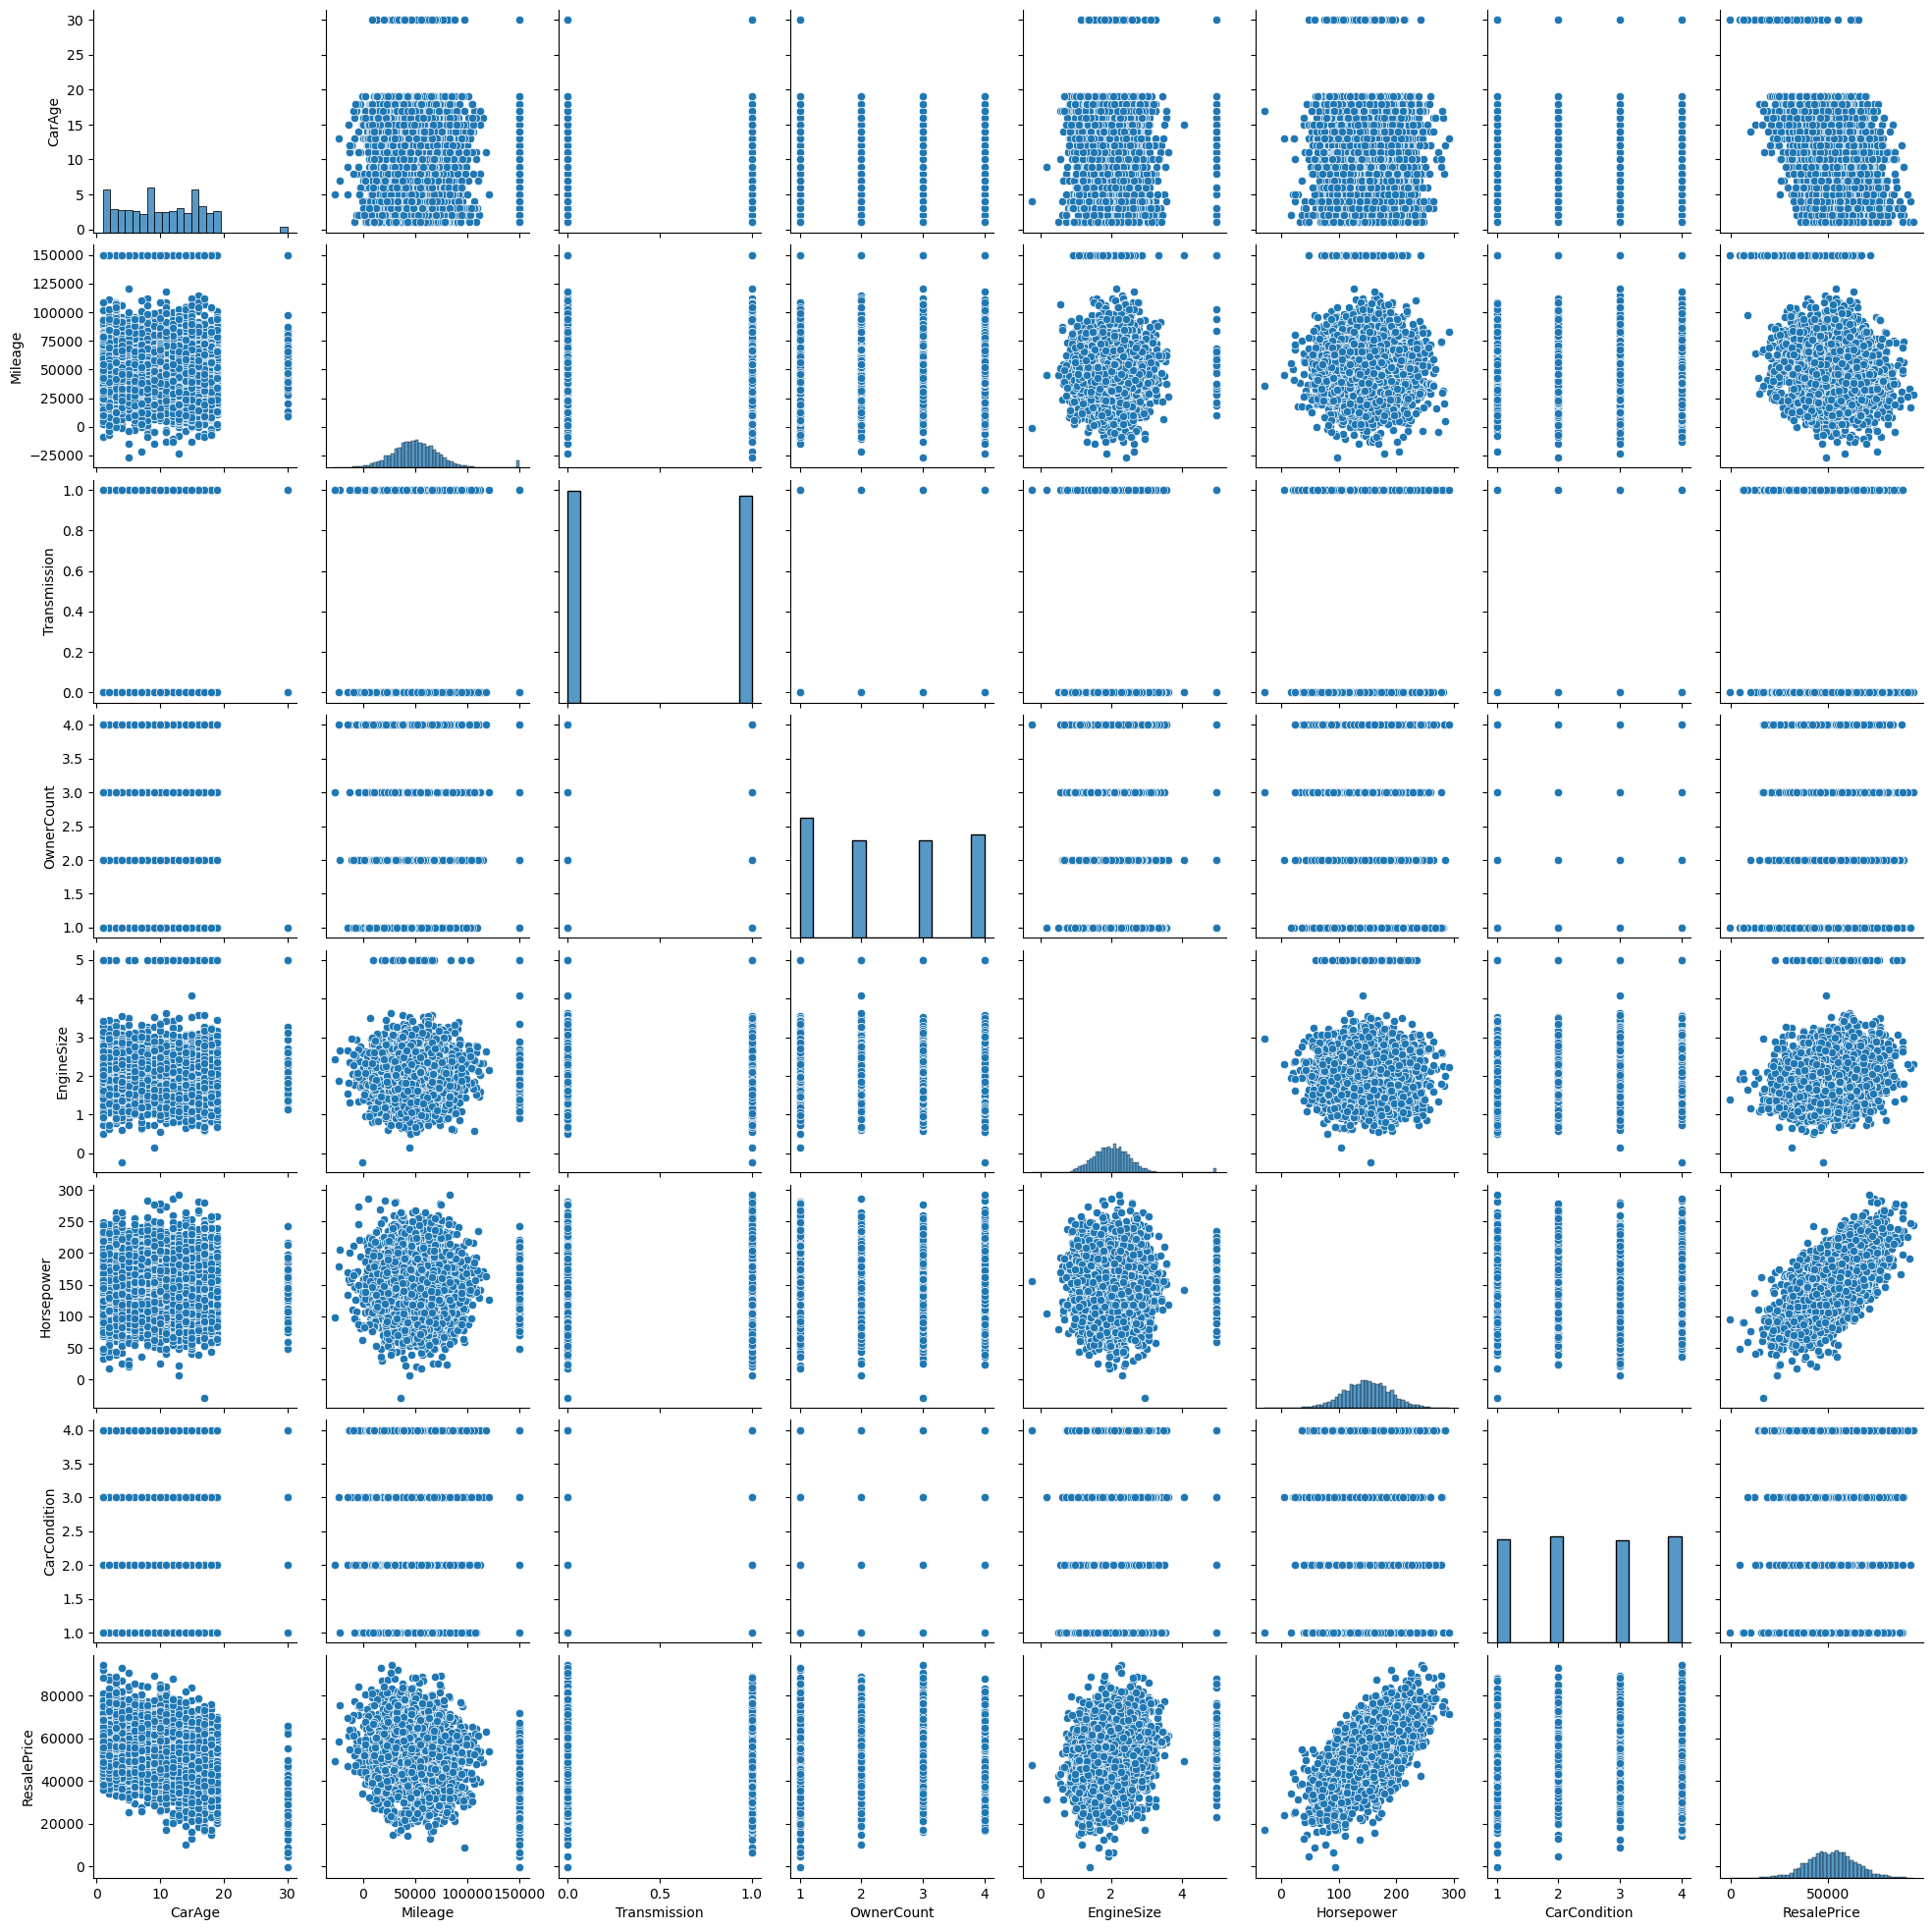

In [185]:
sns.pairplot(data)

In [199]:
# (data['CarAge'] >= 30).sum()
data[data['CarAge']>=20]
data4=data[data['CarAge']<=20]

In [200]:
data4.shape

(4600, 10)

C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

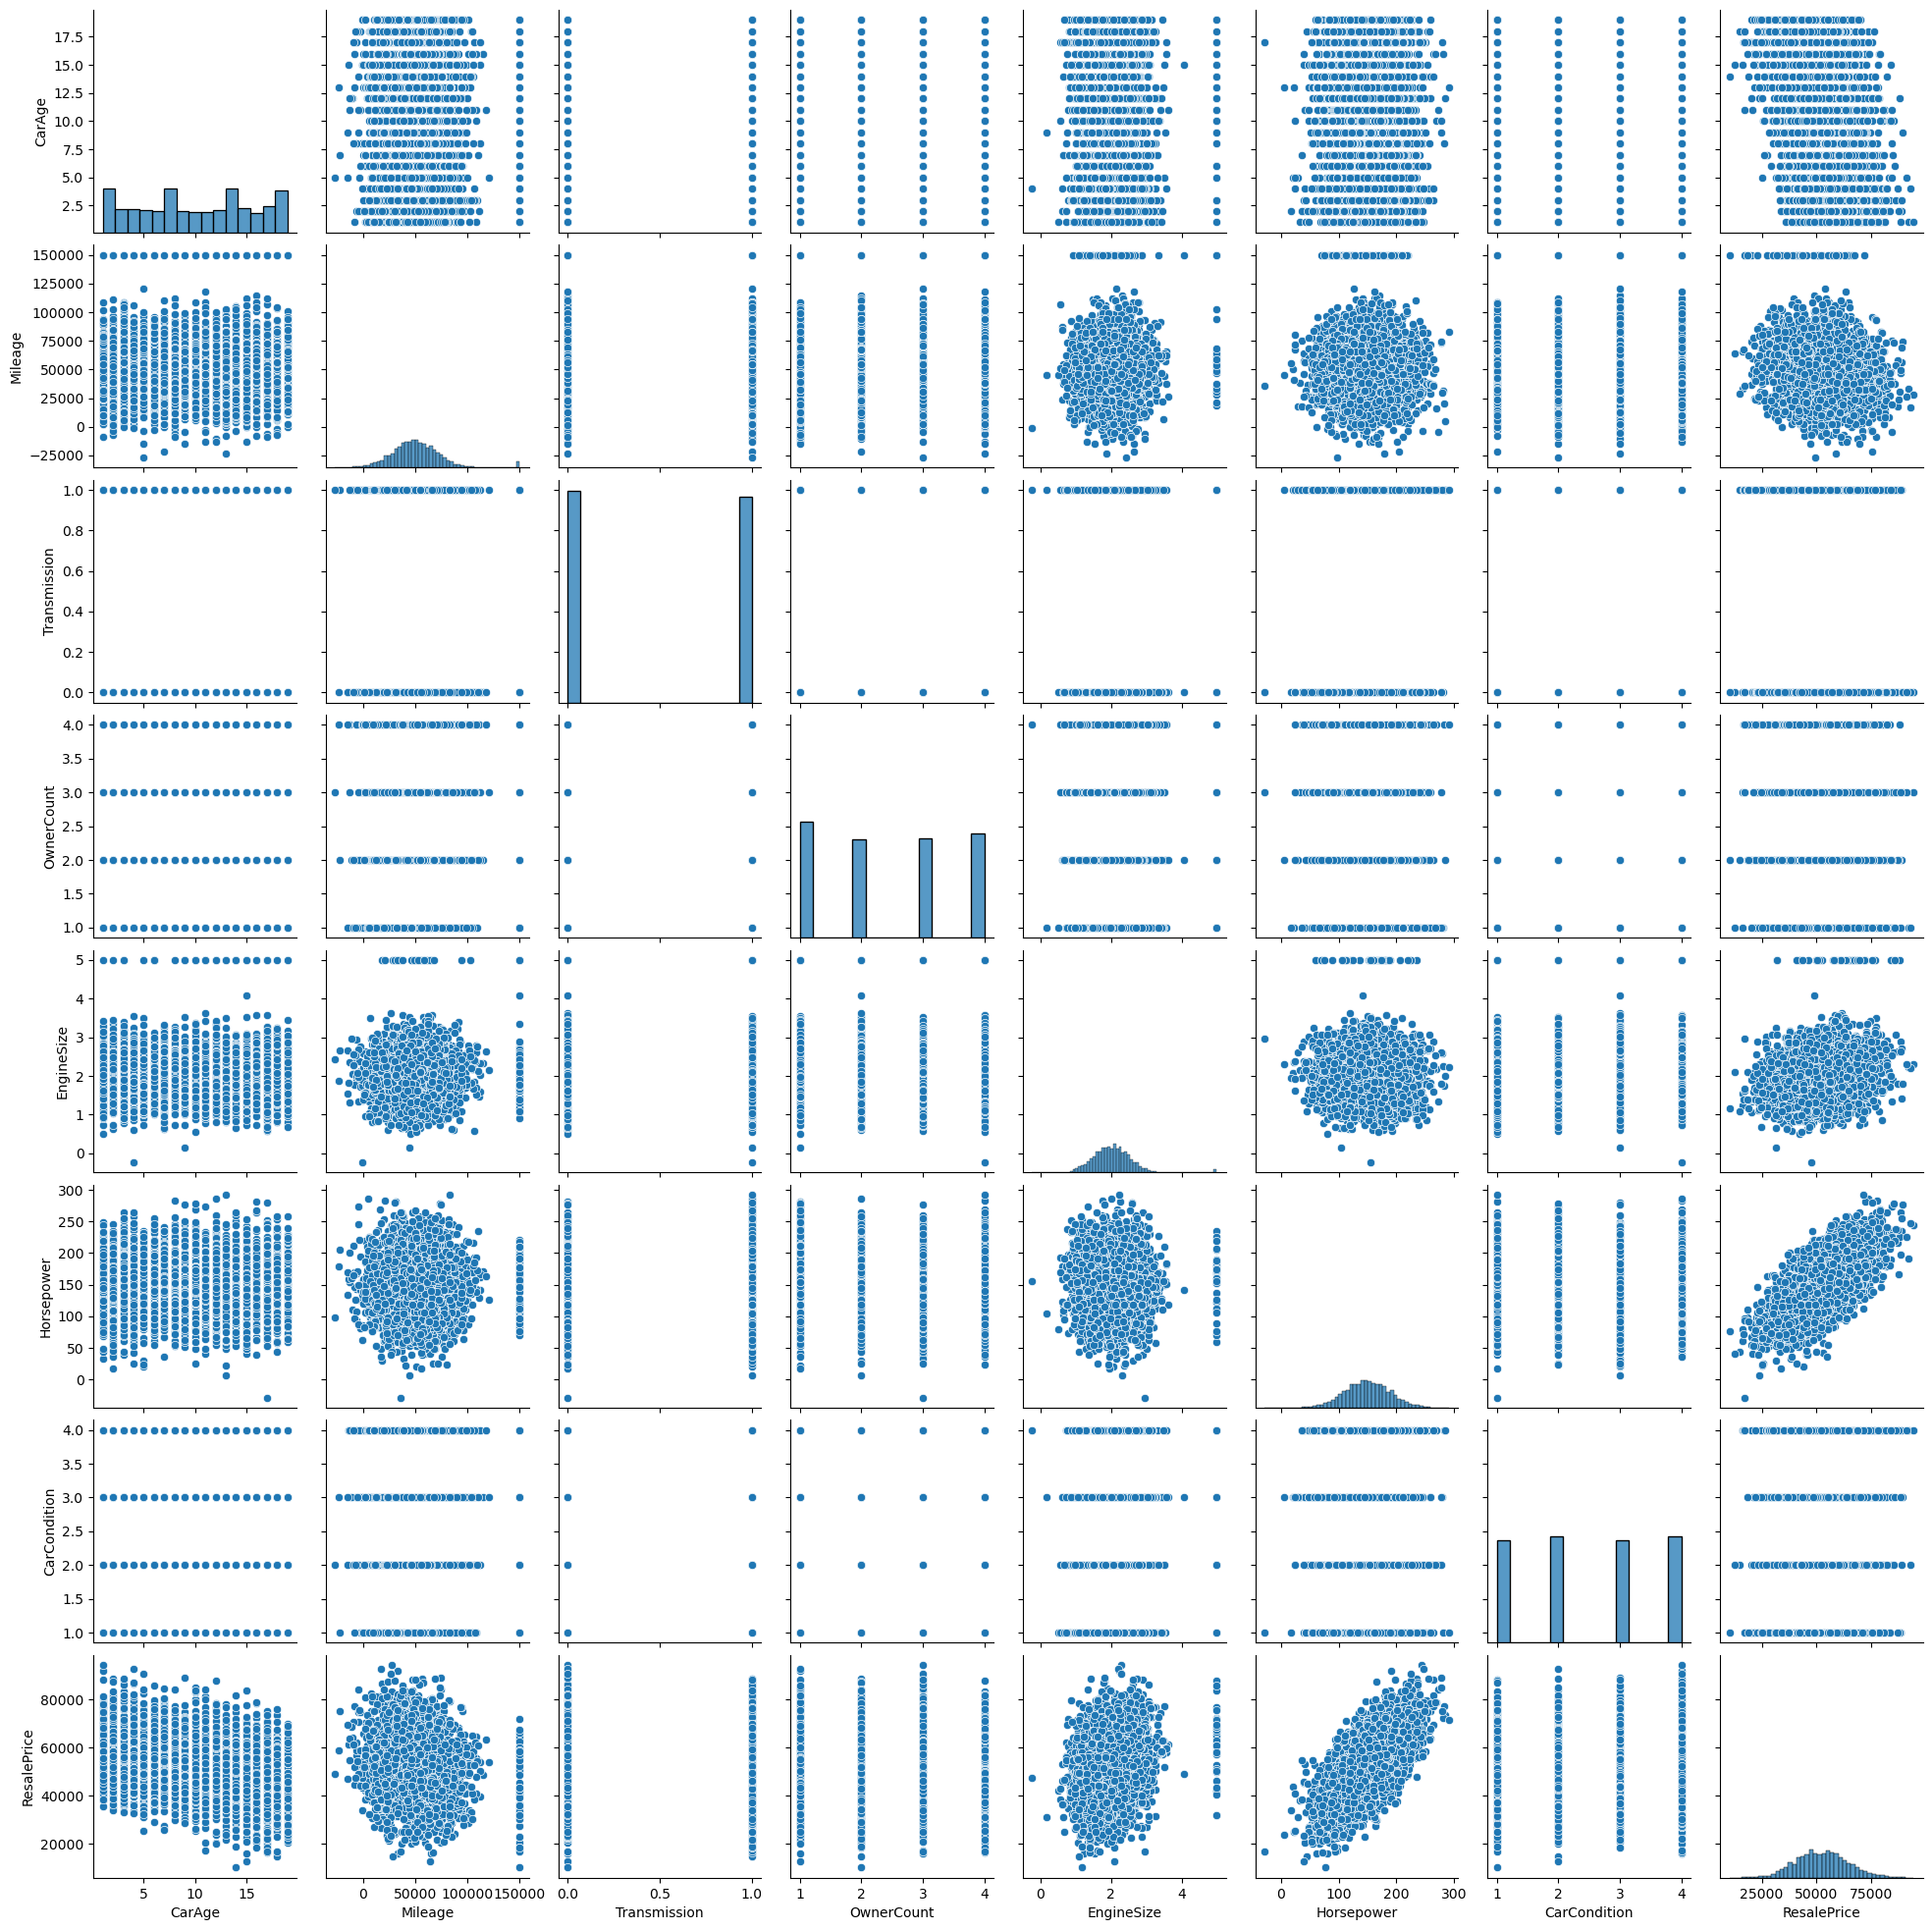

In [201]:
sns.pairplot(data4)

In [218]:
data4[data4['Mileage']>=150000]
data4 = data4[data4['Mileage']<=145000]


In [219]:
data4.shape

(4533, 10)

C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

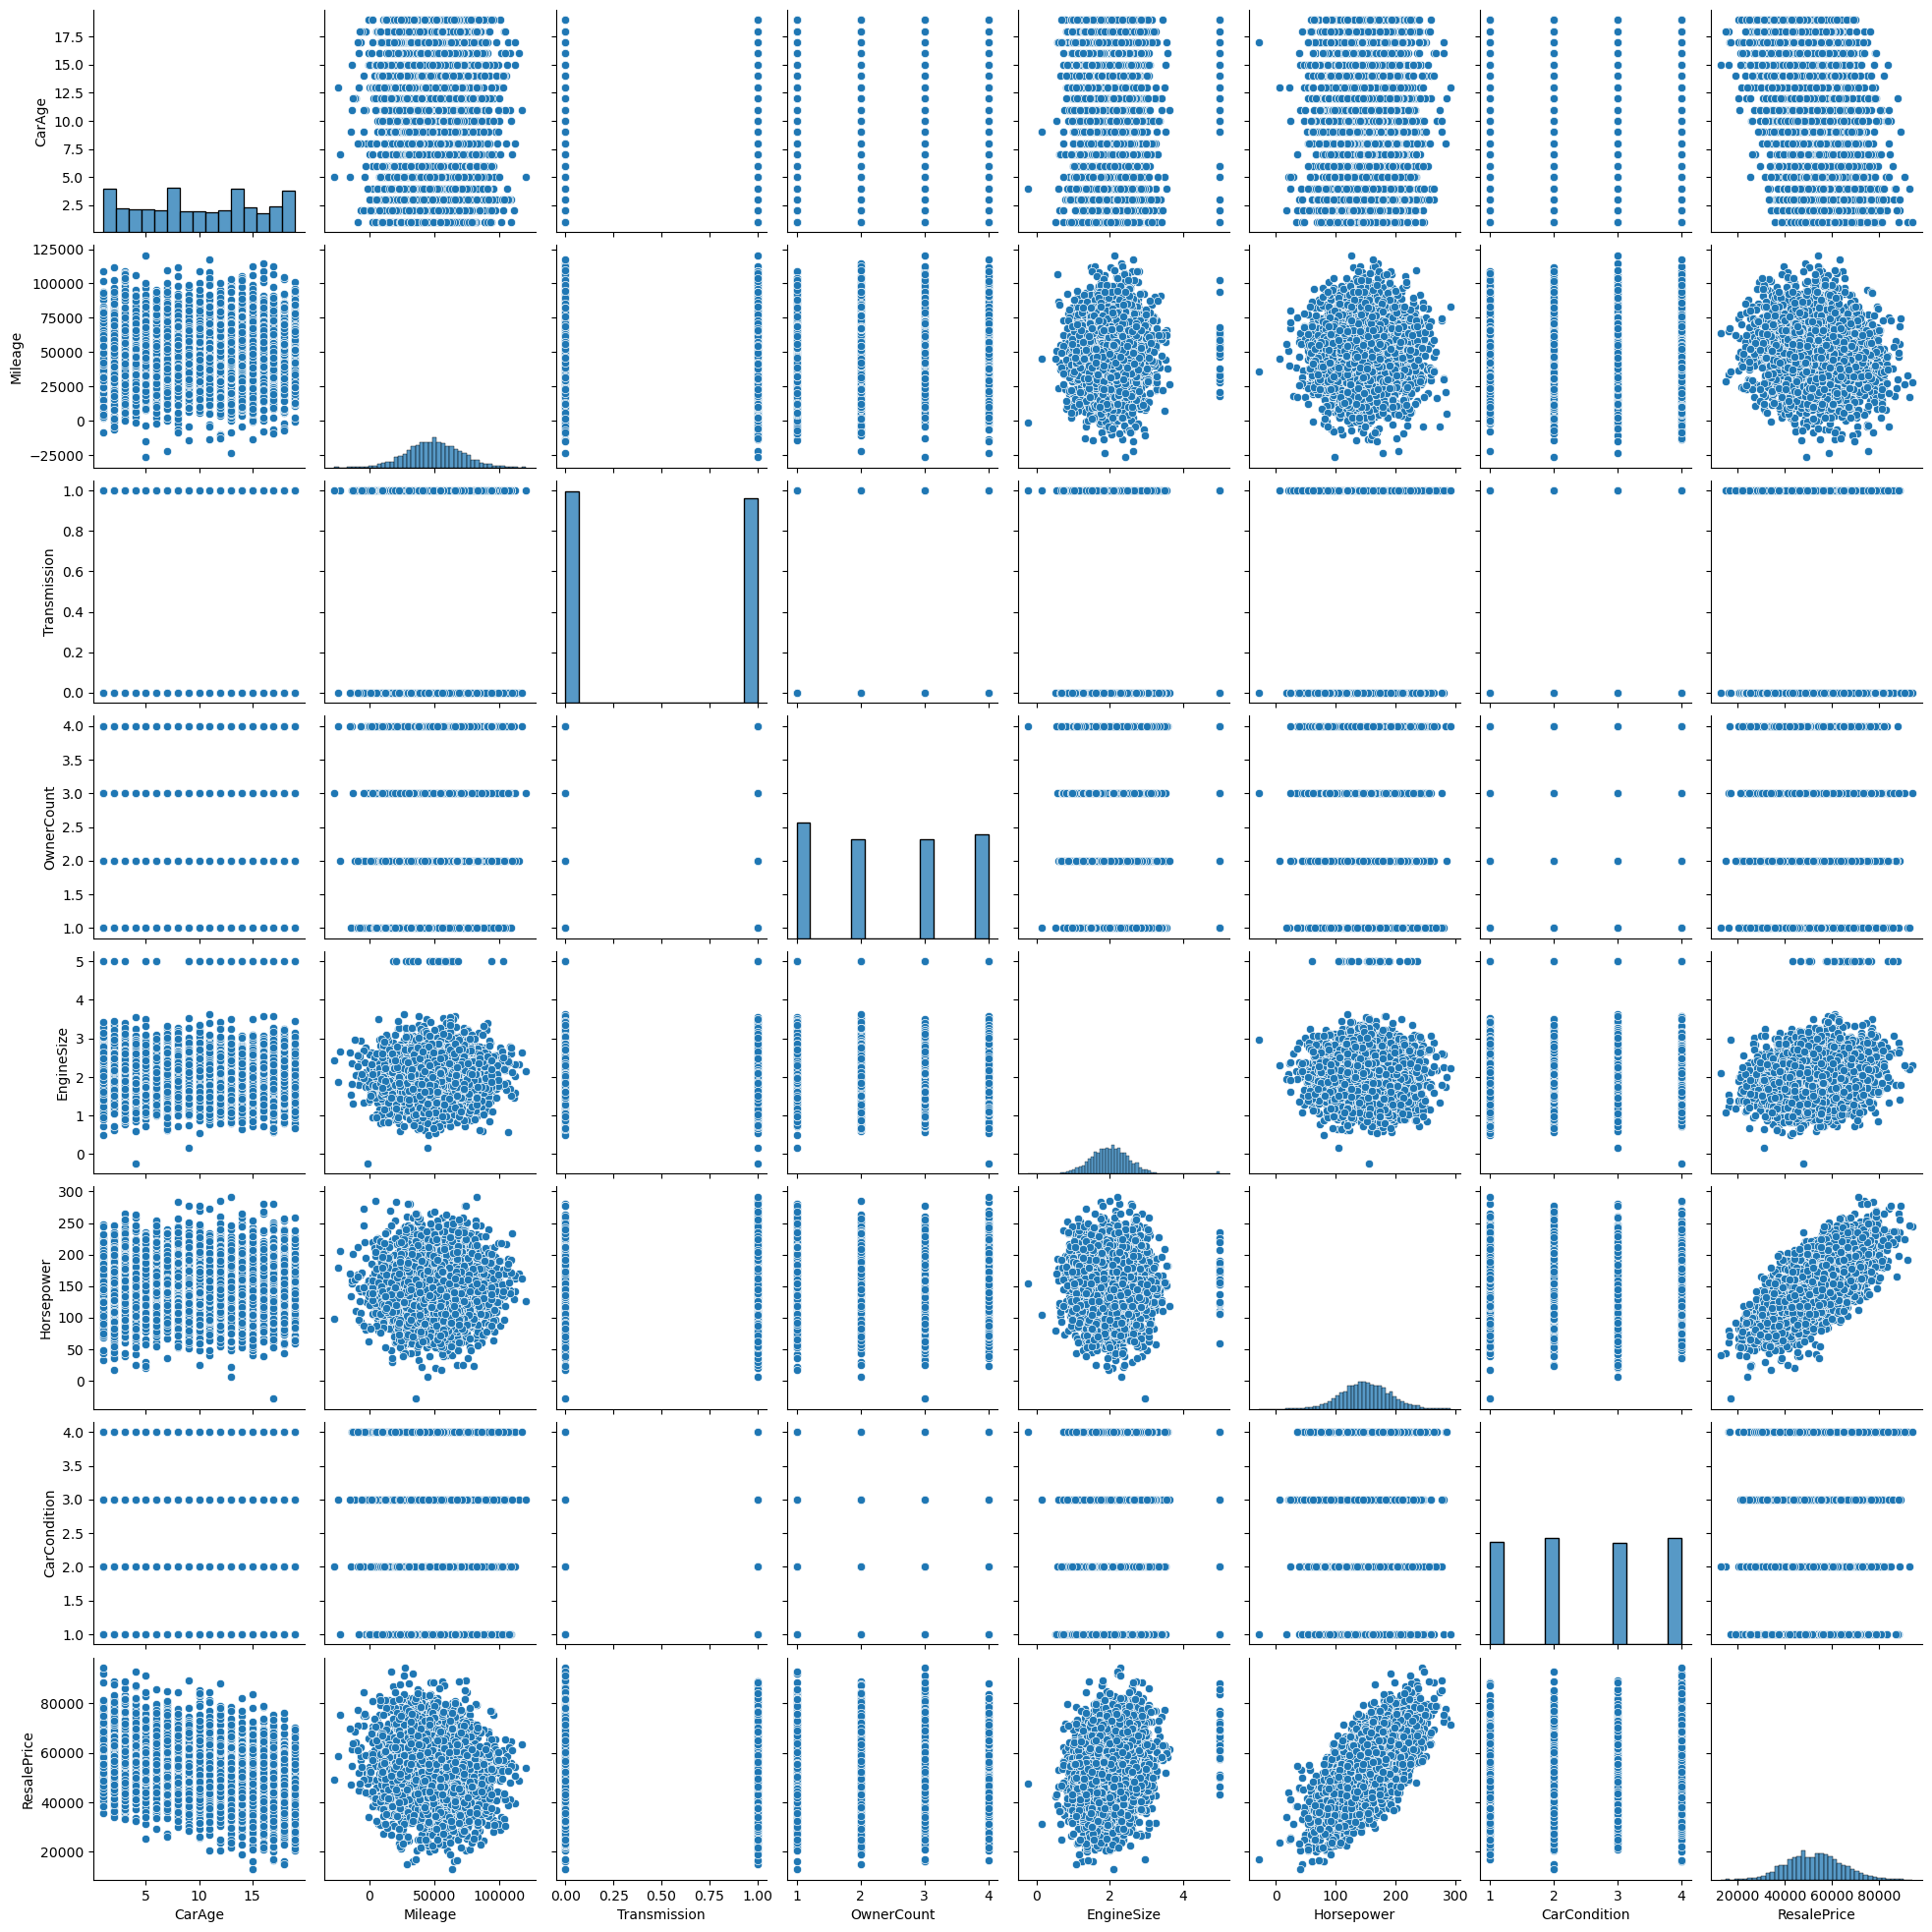

In [220]:
sns.pairplot(data4)

In [236]:
(data['EngineSize'] >= 4.5).sum()

#data4[data4['EngineSize']>=4]
data4 = data4[data4['EngineSize']<=4.5]

In [237]:
data4.shape

(4505, 10)

C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gayathri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

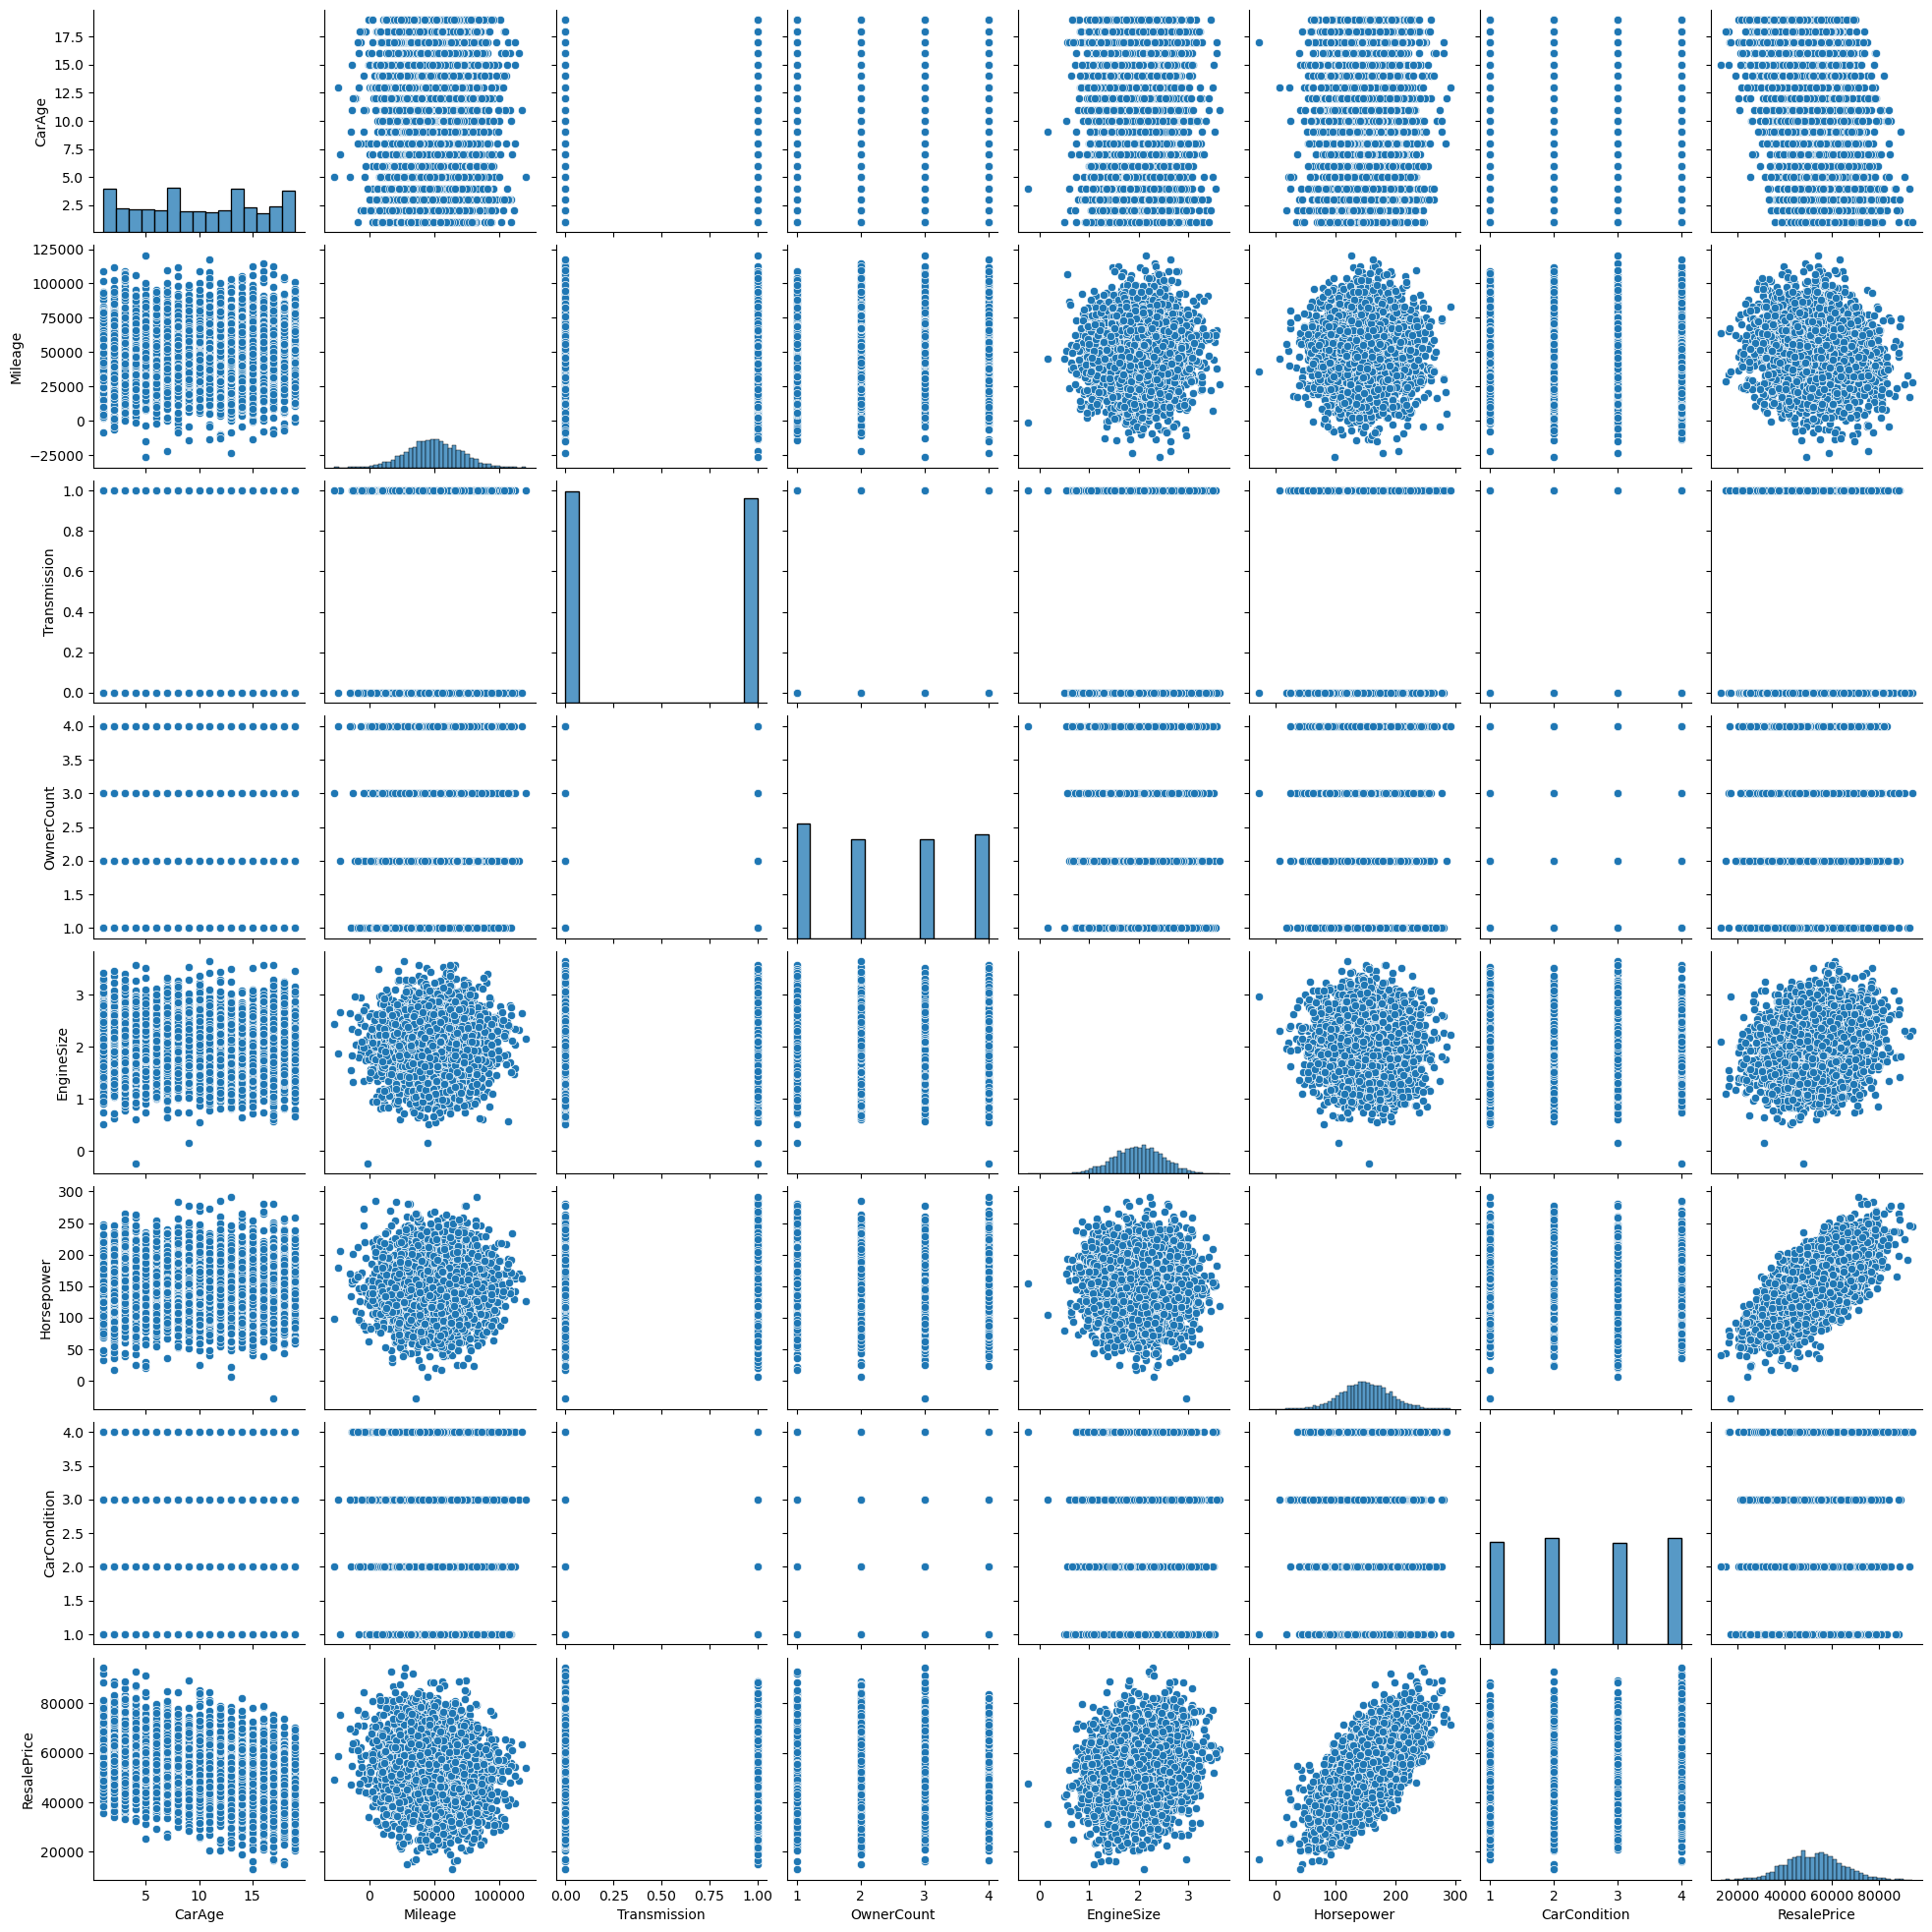

In [238]:
sns.pairplot(data4)

In [239]:
data4.isnull().sum()

CarAge          0
Mileage         0
Brand           0
FuelType        0
Transmission    0
OwnerCount      0
EngineSize      0
Horsepower      0
CarCondition    0
ResalePrice     0
dtype: int64

In [242]:
#Encoding

data4 = pd.get_dummies(data4, columns=['FuelType'], drop_first=True,dtype=int)
data4 = pd.get_dummies(data4, columns=['Brand'], drop_first=True,dtype=int)

KeyError: "None of [Index(['FuelType'], dtype='object')] are in the [columns]"

In [246]:
data4['Transmission']=data['Transmission']
data4['CarCondition']=data['CarCondition']

In [247]:
data4.head()

CarAge   Mileage  Transmission  OwnerCount  EngineSize  Horsepower  \
0      15 70,539.73             0        3.00        1.86      116.78   
1      11 72,118.01             1        4.00        2.46      150.06   
2       8 38,721.05             0        2.00        1.67      140.58   
3       7 33,675.66             1        3.00        2.80      157.02   
4      19 51,562.86             1        4.00        2.42      196.91   

   CarCondition  ResalePrice  FuelType_Electric  FuelType_Hybrid  \
0             1    37,380.23                  1                0   
1             2    58,279.18                  1                0   
2             2    52,420.52                  0                1   
3             1    54,195.80                  0                0   
4             2    57,287.51                  0                0   

   FuelType_Petrol  Brand_BMW  Brand_Ford  Brand_Honda  Brand_Hyundai  \
0                0          0           0            1              0   
1                0          0           0            1              0   
2                0          0           1            0              0   
3                1          0           0            0              0   
4                1          0           0            0              0   

   Brand_Kia  Brand_Mercedes  Brand_Nissan  Brand_Toyota  
0          0               0             0             0  
1          0               0             0             0  
2          0               0             0             0  
3          1               0             0             0  
4          0               1             0             0

In [253]:
X4=data4.drop(columns='ResalePrice')
scaled_featues=X4.columns
data4[scaled_featues]=scaling.fit_transform(data4[scaled_featues])
data4

CarAge  Mileage  Transmission  OwnerCount  EngineSize  Horsepower  \
0       0.92     1.02         -0.98        0.47       -0.30       -0.83   
1       0.19     1.10          1.02        1.35        0.93        0.00   
2      -0.36    -0.53         -0.98       -0.40       -0.69       -0.24   
3      -0.54    -0.78          1.02        0.47        1.60        0.18   
4       1.64     0.10          1.02        1.35        0.84        1.17   
...      ...      ...           ...         ...         ...         ...   
4661   -1.09    -1.32         -0.98       -0.40       -0.34        0.51   
4662   -1.09     0.81          1.02        1.35       -0.34        0.31   
4663   -1.63     0.24          1.02       -0.40        0.95        0.70   
4664   -0.54     0.12         -0.98        1.35       -0.77        1.03   
4665    1.46     0.32         -0.98       -1.28       -2.06        0.59   

      CarCondition  ResalePrice  FuelType_Electric  FuelType_Hybrid  \
0            -1.35    37,380.23               1.75            -0.58   
1            -0.46    58,279.18               1.75            -0.58   
2            -0.46    52,420.52              -0.57             1.73   
3            -1.35    54,195.80              -0.57            -0.58   
4            -0.46    57,287.51              -0.57            -0.58   
...            ...          ...                ...              ...   
4661         -0.46    56,808.96              -0.57             1.73   
4662         -1.35    56,224.63              -0.57            -0.58   
4663          1.33    68,440.02               1.75            -0.58   
4664          1.33    64,847.89              -0.57             1.73   
4665         -0.46    43,329.19              -0.57            -0.58   

      FuelType_Petrol  Brand_BMW  Brand_Ford  Brand_Honda  Brand_Hyundai  \
0               -0.56      -0.36       -0.36         2.89          -0.35   
1               -0.56      -0.36       -0.36         2.89          -0.35   
2               -0.56      -0.36        2.78        -0.35          -0.35   
3                1.77      -0.36       -0.36        -0.35          -0.35   
4                1.77      -0.36       -0.36        -0.35          -0.35   
...               ...        ...         ...          ...            ...   
4661            -0.56      -0.36       -0.36        -0.35          -0.35   
4662            -0.56      -0.36       -0.36        -0.35           2.82   
4663            -0.56      -0.36        2.78        -0.35          -0.35   
4664            -0.56      -0.36       -0.36        -0.35          -0.35   
4665             1.77      -0.36       -0.36        -0.35          -0.35   

      Brand_Kia  Brand_Mercedes  Brand_Nissan  Brand_Toyota  
0         -0.36           -0.35         -0.34         -0.36  
1         -0.36           -0.35         -0.34         -0.36  
2         -0.36           -0.35         -0.34         -0.36  
3          2.81           -0.35         -0.34         -0.36  
4         -0.36            2.82         -0.34         -0.36  
...         ...             ...           ...           ...  
4661      -0.36           -0.35         -0.34         -0.36  
4662      -0.36           -0.35         -0.34         -0.36  
4663      -0.36           -0.35         -0.34         -0.36  
4664      -0.36           -0.35         -0.34          2.81  
4665      -0.36           -0.35         -0.34          2.81  

[4505 rows x 19 columns]

In [254]:
X4=data4.drop(columns='ResalePrice')
y4=data4['ResalePrice']
train_X4,test_X4,train_y4,test_y4=train_test_split(X4,y4,test_size=0.3,random_state=23)
model.fit(X4,y4)


LinearRegression()

In [255]:
model.coef_

array([-5397.00821787, -1946.45669569,   117.48540154,   139.59478247,
        2512.6960074 ,  7943.02926589,  1607.09575648,  -113.10136147,
         -95.53165935,  -151.64829522,    56.94651318,   145.95050304,
          12.17830081,   -46.08183083,   151.46158015,   -54.76003538,
         102.79019266,   -19.36234838])

In [256]:
model.intercept_

52543.055402542486

In [257]:
train_predict4=model.predict(train_X4)
test_predict4=model.predict(test_X4)
train_result4=evaluate(train_y4,train_predict4,"train_result4")
test_result4=evaluate(test_y4,test_predict4,"test_result4")
fourth_prediction_result=pd.DataFrame([train_result4]+[test_result4],index=["train","test"],columns=["MSE","RMSE","MAPE","r square"])
fourth_prediction_result


train_result4
MSE
34823019.0164877
RMSE
5901.103203341533
MAPE
0.09276530747894823
R square
0.6549839479077246
test_result4
MSE
32098033.11034322
RMSE
5665.512607906121
MAPE
0.09000083139666573
R square
0.6983954093171808


MSE     RMSE  MAPE  r square
train 34,823,019.02 5,901.10  0.09      0.65
test  32,098,033.11 5,665.51  0.09      0.70

# Prediction 5
1.remove negative values in Mileage, enginesize and horsepower
2.Encode catagorical columns
3.standardization

In [283]:
data.describe()

CarAge    Mileage  Transmission  OwnerCount  EngineSize  Horsepower  \
count 4,666.00   4,666.00      4,666.00    4,666.00    4,666.00    4,666.00   
mean     10.27  51,426.43          0.49        2.44        2.04      149.85   
std       5.94  24,202.42          0.50        1.15        0.58       39.99   
min       1.00 -26,733.11          0.00        1.00       -0.24      -28.62   
25%       5.00  36,405.52          0.00        1.00        1.67      122.89   
50%      10.00  49,959.17          0.00        2.00        2.02      149.58   
75%      15.00  64,324.46          1.00        3.00        2.36      176.63   
max      30.00 150,000.00          1.00        4.00        5.00      291.70   

       CarCondition  ResalePrice  
count      4,666.00     4,666.00  
mean           2.51    52,181.77  
std            1.12    12,106.95  
min            1.00      -599.85  
25%            2.00    44,039.24  
50%            2.00    52,222.64  
75%            4.00    60,278.03  
max            4.00    94,400.29

In [284]:
# Extract negative values
data[data['Mileage'] < 0]

CarAge    Mileage     Brand  FuelType  Transmission  OwnerCount  \
21        19    -644.92       BMW    Hybrid             0        4.00   
67         1  -8,588.97     Honda    Hybrid             1        2.00   
92         8  -2,062.74      Ford    Diesel             0        3.00   
582       14  -4,087.83  Mercedes    Diesel             1        2.00   
607        2  -6,781.57    Toyota  Electric             1        2.00   
712       11  -2,614.60       BMW    Hybrid             0        4.00   
761       12 -10,152.65    Toyota    Hybrid             1        1.00   
1152      18  -6,750.13       Kia    Diesel             1        2.00   
1169      13  -8,285.12  Mercedes    Hybrid             0        1.00   
1173       8  -6,646.52    Nissan  Electric             0        4.00   
1253      11 -13,408.51   Hyundai    Hybrid             1        4.00   
1303      15 -13,534.08    Toyota    Hybrid             0        1.00   
1370       6  -2,496.34     Honda    Petrol             1        1.00   
1983      15    -635.39      Ford    Hybrid             0        1.00   
2084       4  -1,070.99       BMW    Hybrid             1        4.00   
2109      17  -6,660.61       Kia    Petrol             0        4.00   
2248      16    -131.43  Mercedes    Diesel             0        3.00   
2351       2    -445.56    Nissan    Hybrid             1        4.00   
2356      16  -7,990.28    Toyota    Petrol             0        1.00   
2624      11  -4,252.25       Kia    Hybrid             1        1.00   
2845      18  -2,362.66    Nissan  Electric             0        2.00   
2926       2  -4,066.96       Kia    Hybrid             1        2.00   
2948       5  -3,491.34    Nissan    Petrol             1        2.00   
3062       9  -4,150.88   Hyundai    Hybrid             0        3.00   
3507       9 -14,420.33  Mercedes    Petrol             0        1.00   
3647      17  -9,084.98      Ford    Diesel             0        1.00   
3661      12 -10,893.13     Honda    Diesel             1        2.00   
3841      18  -5,476.30      Audi  Electric             1        1.00   
3947      13 -23,767.31  Mercedes    Petrol             0        4.00   
4008       7 -22,021.70       BMW    Hybrid             1        2.00   
4177      18  -7,000.60       BMW    Diesel             0        1.00   
4332      12 -12,770.29    Toyota    Hybrid             1        3.00   
4478       5 -14,830.28       BMW    Diesel             0        4.00   
4496       5 -26,733.11      Ford    Diesel             1        3.00   
4574       8  -8,862.83       Kia    Hybrid             0        2.00   

      EngineSize  Horsepower  CarCondition  ResalePrice  
21          1.36       62.19             3    33,956.83  
67          2.07      168.96             4    77,372.99  
92          1.80      124.11             3    52,025.46  
582         2.68      245.93             2    75,012.53  
607         2.44      142.44             2    62,206.76  
712         2.14      194.66             3    74,869.49  
761         2.05      110.48             4    64,119.04  
1152        1.89      167.83             4    56,905.32  
1169        1.78      146.24             2    51,870.07  
1173        2.01       93.13             3    58,820.58  
1253        2.35      153.54             4    54,841.28  
1303        1.83      158.57             4    61,289.38  
1370        1.73      140.91             1    59,013.62  
1983        1.76      134.42             1    43,538.91  
2084       -0.24      154.81             4    47,693.54  
2109        2.94      107.72             2    44,835.91  
2248        1.99      159.17             4    65,762.50  
2351        1.89       84.94             3    49,408.61  
2356        2.58       96.38             1    44,642.75  
2624        1.35      273.21             2    84,339.51  
2845        2.77       80.38             4    44,153.20  
2926        2.70      148.76             2    70,815.78  
2948        2.39      220.11             4 

In [285]:
data[data['EngineSize'] < 0]

CarAge   Mileage Brand FuelType  Transmission  OwnerCount  EngineSize  \
2084       4 -1,070.99   BMW   Hybrid             1        4.00       -0.24   

      Horsepower  CarCondition  ResalePrice  
2084      154.81             4    47,693.54

In [286]:
data[data['Horsepower']<0]

CarAge   Mileage   Brand FuelType  Transmission  OwnerCount  EngineSize  \
4304      17 35,851.21  Nissan   Petrol             0        3.00        2.97   

      Horsepower  CarCondition  ResalePrice  
4304      -28.62             1    16,987.29

In [293]:
data5 =data[data['Mileage'] >= 0]
data5

CarAge   Mileage     Brand  FuelType  Transmission  OwnerCount  \
0         15 70,539.73     Honda  Electric             0        3.00   
1         11 72,118.01     Honda  Electric             1        4.00   
2          8 38,721.05      Ford    Hybrid             0        2.00   
3          7 33,675.66       Kia    Petrol             1        3.00   
4         19 51,562.86  Mercedes    Petrol             1        4.00   
...      ...       ...       ...       ...           ...         ...   
4661       4 22,710.58      Audi    Hybrid             0        2.00   
4662       4 66,193.15   Hyundai    Diesel             1        4.00   
4663       1 54,614.23      Ford  Electric             1        2.00   
4664       7 52,035.77    Toyota    Hybrid             0        4.00   
4665      18 56,126.95    Toyota    Petrol             0        1.00   

      EngineSize  Horsepower  CarCondition  ResalePrice  
0           1.86      116.78             1    37,380.23  
1           2.46      150.06             2    58,279.18  
2           1.67      140.58             2    52,420.52  
3           2.80      157.02             1    54,195.80  
4           2.42      196.91             2    57,287.51  
...          ...         ...           ...          ...  
4661        1.84      170.18             2    56,808.96  
4662        1.84      162.18             1    56,224.63  
4663        2.48      178.08             4    68,440.02  
4664        1.63      191.21             4    64,847.89  
4665        0.99      173.37             2    43,329.19  

[4631 rows x 10 columns]

In [294]:
data5 = data5[data5['EngineSize'] >= 0]
data5

CarAge   Mileage     Brand  FuelType  Transmission  OwnerCount  \
0         15 70,539.73     Honda  Electric             0        3.00   
1         11 72,118.01     Honda  Electric             1        4.00   
2          8 38,721.05      Ford    Hybrid             0        2.00   
3          7 33,675.66       Kia    Petrol             1        3.00   
4         19 51,562.86  Mercedes    Petrol             1        4.00   
...      ...       ...       ...       ...           ...         ...   
4661       4 22,710.58      Audi    Hybrid             0        2.00   
4662       4 66,193.15   Hyundai    Diesel             1        4.00   
4663       1 54,614.23      Ford  Electric             1        2.00   
4664       7 52,035.77    Toyota    Hybrid             0        4.00   
4665      18 56,126.95    Toyota    Petrol             0        1.00   

      EngineSize  Horsepower  CarCondition  ResalePrice  
0           1.86      116.78             1    37,380.23  
1           2.46      150.06             2    58,279.18  
2           1.67      140.58             2    52,420.52  
3           2.80      157.02             1    54,195.80  
4           2.42      196.91             2    57,287.51  
...          ...         ...           ...          ...  
4661        1.84      170.18             2    56,808.96  
4662        1.84      162.18             1    56,224.63  
4663        2.48      178.08             4    68,440.02  
4664        1.63      191.21             4    64,847.89  
4665        0.99      173.37             2    43,329.19  

[4631 rows x 10 columns]

In [295]:
data5 = data5[data5['Horsepower'] >= 0]


In [296]:
data5.shape

(4630, 10)

In [297]:
data5.head()

CarAge   Mileage     Brand  FuelType  Transmission  OwnerCount  EngineSize  \
0      15 70,539.73     Honda  Electric             0        3.00        1.86   
1      11 72,118.01     Honda  Electric             1        4.00        2.46   
2       8 38,721.05      Ford    Hybrid             0        2.00        1.67   
3       7 33,675.66       Kia    Petrol             1        3.00        2.80   
4      19 51,562.86  Mercedes    Petrol             1        4.00        2.42   

   Horsepower  CarCondition  ResalePrice  
0      116.78             1    37,380.23  
1      150.06             2    58,279.18  
2      140.58             2    52,420.52  
3      157.02             1    54,195.80  
4      196.91             2    57,287.51

In [298]:
#Encoding

data5 = pd.get_dummies(data5, columns=['FuelType'], drop_first=True,dtype=int)
data5 = pd.get_dummies(data5, columns=['Brand'], drop_first=True,dtype=int)

In [299]:
X5=data5.drop(columns='ResalePrice')
scaled_featues=X5.columns
data5[scaled_featues]=scaling.fit_transform(data5[scaled_featues])
data5

CarAge  Mileage  Transmission  OwnerCount  EngineSize  Horsepower  \
0       0.80     0.79         -0.99        0.49       -0.31       -0.83   
1       0.12     0.85          1.01        1.36        0.74        0.00   
2      -0.38    -0.55         -0.99       -0.38       -0.64       -0.23   
3      -0.55    -0.77          1.01        0.49        1.32        0.18   
4       1.47    -0.01          1.01        1.36        0.67        1.18   
...      ...      ...           ...         ...         ...         ...   
4661   -1.05    -1.23         -0.99       -0.38       -0.34        0.51   
4662   -1.05     0.60          1.01        1.36       -0.34        0.31   
4663   -1.56     0.12          1.01       -0.38        0.76        0.71   
4664   -0.55     0.01         -0.99        1.36       -0.71        1.04   
4665    1.30     0.18         -0.99       -1.26       -1.82        0.59   

      CarCondition  ResalePrice  FuelType_Electric  FuelType_Hybrid  \
0            -1.35    37,380.23               1.75            -0.58   
1            -0.45    58,279.18               1.75            -0.58   
2            -0.45    52,420.52              -0.57             1.73   
3            -1.35    54,195.80              -0.57            -0.58   
4            -0.45    57,287.51              -0.57            -0.58   
...            ...          ...                ...              ...   
4661         -0.45    56,808.96              -0.57             1.73   
4662         -1.35    56,224.63              -0.57            -0.58   
4663          1.34    68,440.02               1.75            -0.58   
4664          1.34    64,847.89              -0.57             1.73   
4665         -0.45    43,329.19              -0.57            -0.58   

      FuelType_Petrol  Brand_BMW  Brand_Ford  Brand_Honda  Brand_Hyundai  \
0               -0.56      -0.36       -0.36         2.87          -0.36   
1               -0.56      -0.36       -0.36         2.87          -0.36   
2               -0.56      -0.36        2.76        -0.35          -0.36   
3                1.77      -0.36       -0.36        -0.35          -0.36   
4                1.77      -0.36       -0.36        -0.35          -0.36   
...               ...        ...         ...          ...            ...   
4661            -0.56      -0.36       -0.36        -0.35          -0.36   
4662            -0.56      -0.36       -0.36        -0.35           2.81   
4663            -0.56      -0.36        2.76        -0.35          -0.36   
4664            -0.56      -0.36       -0.36        -0.35          -0.36   
4665             1.77      -0.36       -0.36        -0.35          -0.36   

      Brand_Kia  Brand_Mercedes  Brand_Nissan  Brand_Toyota  
0         -0.35           -0.35         -0.34         -0.36  
1         -0.35           -0.35         -0.34         -0.36  
2         -0.35           -0.35         -0.34         -0.36  
3          2.82           -0.35         -0.34         -0.36  
4         -0.35            2.83         -0.34         -0.36  
...         ...             ...           ...           ...  
4661      -0.35           -0.35         -0.34         -0.36  
4662      -0.35           -0.35         -0.34         -0.36  
4663      -0.35           -0.35         -0.34         -0.36  
4664      -0.35           -0.35         -0.34          2.81  
4665      -0.35           -0.35         -0.34          2.81  

[4630 rows x 19 columns]

In [300]:
X5=data5.drop(columns='ResalePrice')
y5=data5['ResalePrice']
train_X5,test_X5,train_y5,test_y5=train_test_split(X5,y5,test_size=0.3,random_state=23)
model.fit(X5,y5)

LinearRegression()

In [301]:
train_predict5=model.predict(train_X5)
test_predict5=model.predict(test_X5)
train_result5=evaluate(train_y5,train_predict5,"train_result5")
test_result5=evaluate(test_y5,test_predict5,"test_result5")
fifth_prediction_result=pd.DataFrame([train_result5]+[test_result5],index=["train","test"],columns=["MSE","RMSE","MAPE","r square"])
fifth_prediction_result

train_result5
MSE
33541552.942494787
RMSE
5791.506966454826
MAPE
0.09262006301458
R square
0.6936428091745785
test_result5
MSE
35672321.97165734
RMSE
5972.631076138668
MAPE
0.09722087972523506
R square
0.6952734987599082


MSE     RMSE  MAPE  r square
train 33,541,552.94 5,791.51  0.09      0.69
test  35,672,321.97 5,972.63  0.10      0.70